## Time to compare across browsers/OS and see if there are ANY common canvases
also, see if there are any commonalities across browsers in terms of the number of canvases and unique calls...

In [3]:
import json
import os

# Directory path
directory_path = "../canvas-data"

# Combined data dictionary
combined_data = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".json"):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as f:
            data = json.load(f)
            # Extract the filename without the extension
            key = os.path.splitext(filename)[0]
            # Store the data in the dictionary
            combined_data[key] = data

# Example of how to access the combined data
# print(json.dumps(combined_data, indent=2))


In [5]:
combined_data.keys()

dict_keys(['seoyoung_windows_firefox', 'elisa-chrome', 'seoyoung_macos_edge', 'liam-safari-mac', 'seoyoung_windows_edge', 'liam-brave-mac', 'seoyoung_windows_chrome', 'seoyoung_macos_firefox', 'elisa-FF', 'seoyoung_macos_brave', 'seoyoung_windows_brave', 'liam-chrome-mac', 'seoyoung_macos_chrome', 'liam-firefox-mac'])

In [6]:
from collections import defaultdict

def group_data_by_common_img(data):
    # Grouping by imageData
    grouped = defaultdict(list)

    for item in data:
        image_data = item['imageData']
        subset = item['encodedSubset']
        grouped[image_data].append(subset)

    # Converting defaultdict to a regular dict
    result = dict(grouped)

    # # Output the result
    # for image, subsets in result.items():
    #     print(f"ImageData: {image[:50]}... -> Subsets: {subsets}")
    return result

def get_size_of_grouped_data(data):
    return {k: len(v) for k, v in data.items()}

In [9]:
combined_grouped_data = {k: group_data_by_common_img(v) for k, v in combined_data.items()}

### Number of unique canvases generated through the 512 subsets

In [8]:
for key in combined_data:
    data = combined_data[key]
    grouped_data = group_data_by_common_img(data)
    size_of_grouped_data = get_size_of_grouped_data(grouped_data)
    print(key, len(grouped_data))

seoyoung_windows_firefox 117
elisa-chrome 103
seoyoung_macos_edge 103
liam-safari-mac 103
seoyoung_windows_edge 103
liam-brave-mac 103
seoyoung_windows_chrome 103
seoyoung_macos_firefox 117
elisa-FF 117
seoyoung_macos_brave 103
seoyoung_windows_brave 103
liam-chrome-mac 103
seoyoung_macos_chrome 103
liam-firefox-mac 117


## see if any have keys in common

In [13]:
def find_common_keys(dicts_by_name):
    keys_by_name = {name: set(d.keys()) for name, d in dicts_by_name.items()}
    common_info = []

    for name1, keys1 in keys_by_name.items():
        for name2, keys2 in keys_by_name.items():
            if name1 < name2:  # To avoid duplicate pairs
                common_keys = keys1 & keys2
                if common_keys:
                    common_info.append((name1, name2, list(common_keys)))

    return common_info

In [15]:
common_keys = find_common_keys(combined_grouped_data)

In [21]:
for (k1, k2, v) in common_keys:
    print(k1, k2, len(v))

elisa-chrome seoyoung_macos_edge 6
elisa-chrome seoyoung_windows_edge 3
elisa-chrome seoyoung_windows_chrome 3
elisa-chrome seoyoung_macos_brave 6
elisa-chrome seoyoung_windows_brave 3
elisa-chrome liam-chrome-mac 4
elisa-chrome seoyoung_macos_chrome 6
seoyoung_macos_edge seoyoung_windows_edge 3
seoyoung_macos_edge seoyoung_windows_chrome 3
seoyoung_macos_edge seoyoung_windows_brave 3
seoyoung_windows_chrome seoyoung_windows_edge 103
seoyoung_macos_firefox seoyoung_windows_firefox 3
elisa-FF seoyoung_windows_firefox 3
elisa-FF seoyoung_macos_firefox 3
elisa-FF liam-firefox-mac 117
seoyoung_macos_brave seoyoung_macos_edge 103
seoyoung_macos_brave seoyoung_windows_edge 3
seoyoung_macos_brave seoyoung_windows_chrome 3
seoyoung_macos_brave seoyoung_windows_brave 3
seoyoung_macos_brave seoyoung_macos_chrome 103
seoyoung_windows_brave seoyoung_windows_edge 103
seoyoung_windows_brave seoyoung_windows_chrome 103
liam-chrome-mac seoyoung_macos_edge 4
liam-chrome-mac seoyoung_windows_edge 3
liam

[('elisa-chrome',
  'seoyoung_macos_edge',
  ['',
   '',
   '',
   '',
   '',
   '']),
 ('elisa-chrome',
  'seoyoung_windows_edge',
  ['',
   '',
   '']),
 ('elisa-chrome',
  'seoyoung_windows_chrome',
  ['',
   '',
   '']),
 ('elisa-chrome',
  'seoyoung_macos_brave',
  ['',
   '',
   '',
   '',
   '',
   '']),
 ('elisa-chrome',
  'seoyoung_windows_brave',
  ['',
   '',
   '']),
 ('elisa-chrome',
  'liam-chrome-mac',
  ['',
   '',
   '',
   '']),
 ('elisa-chrome',
  'seoyoung_macos_chrome',
  ['',
   '',
   '',
   '',
   '',
   '']),
 ('seoyoung_macos_edge',
  'seoyoung_windows_edge',
  ['',
   '',
   '']),
 ('seoyoung_macos_edge',
  'seoyoung_windows_chrome',
  ['',
   '',
   '']),
 ('seoyoung_macos_edge',
  'seoyoung_windows_brave',
  ['',
   '',
   '']),
 ('seoyoung_windows_chrome',
  'seoyoung_windows_edge',
  ['',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
 
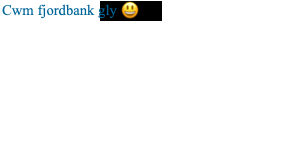
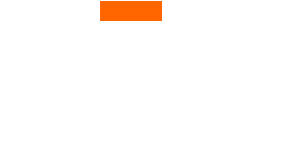
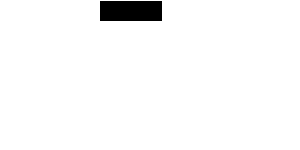
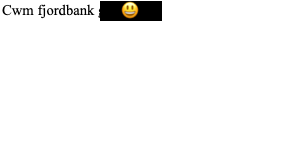
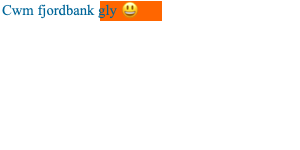
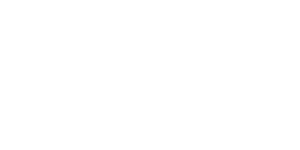
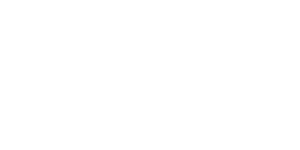
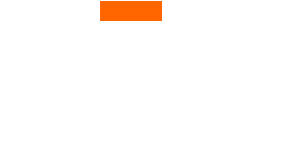
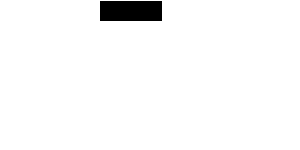
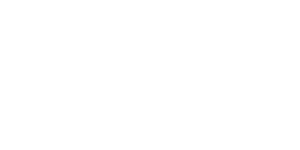
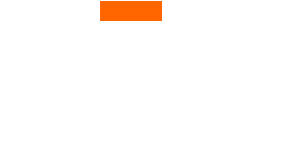
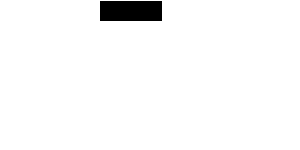
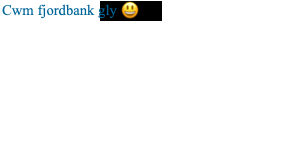
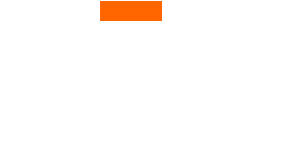
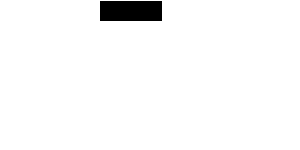
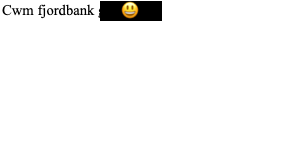
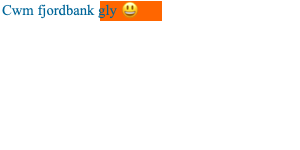
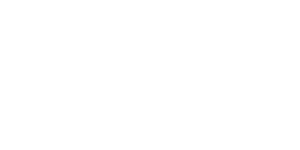
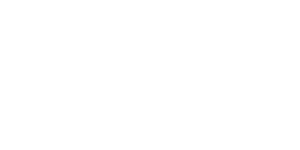
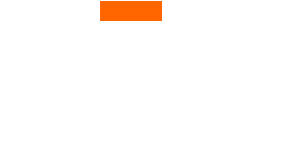
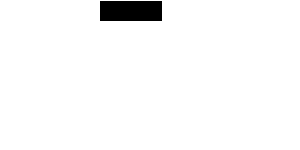
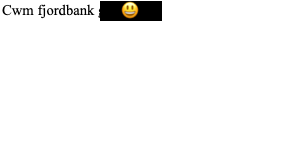
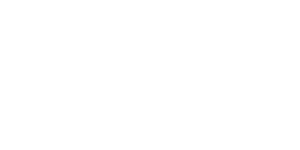
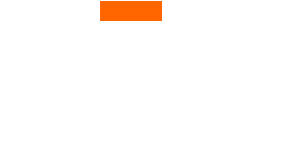
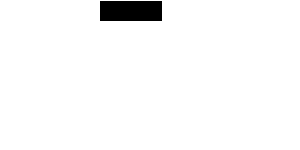
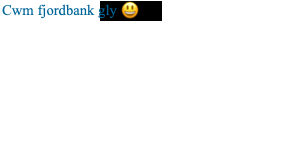
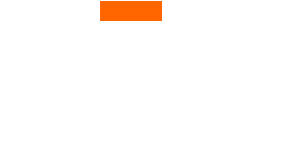
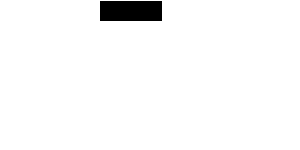
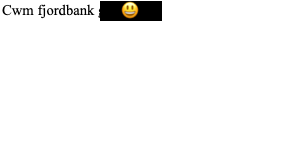
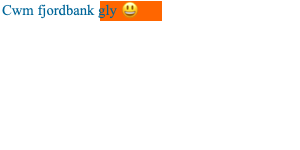
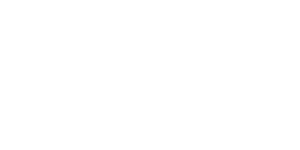
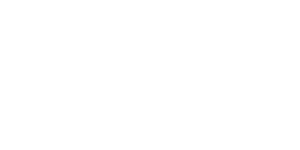
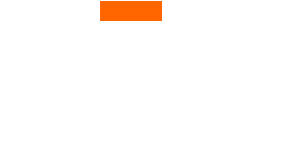
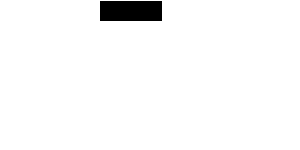
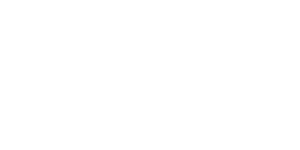
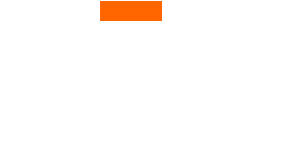
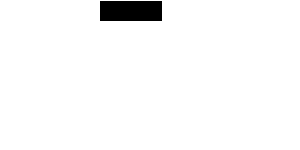
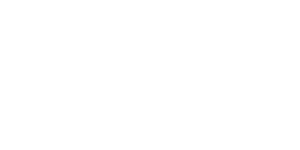
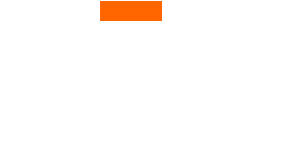
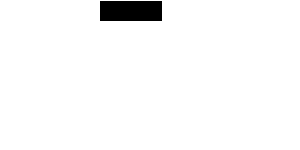
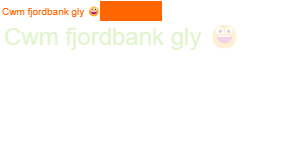
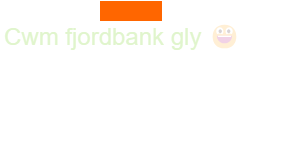
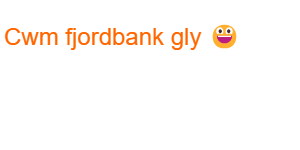
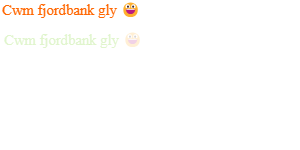
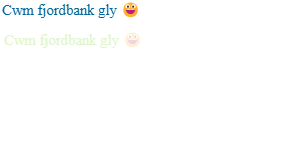
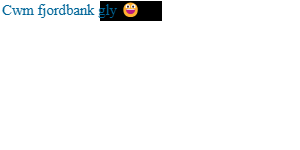
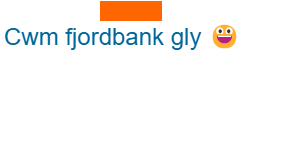
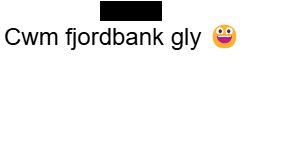
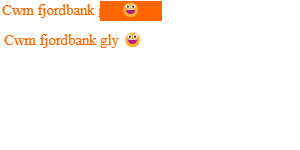
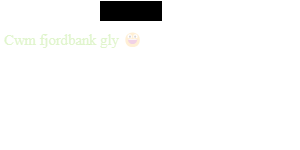
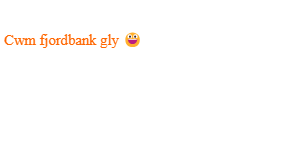
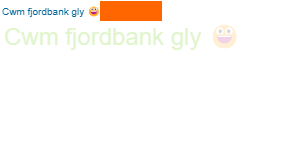
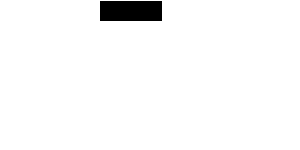
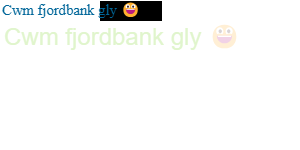
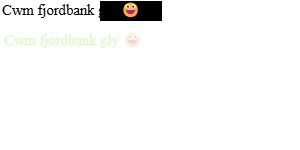
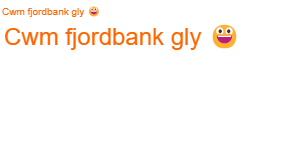
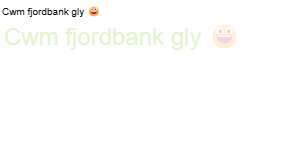
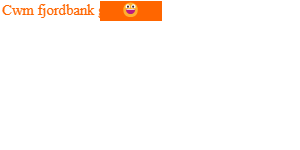
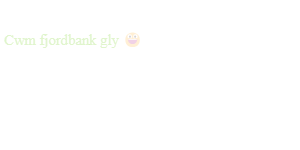
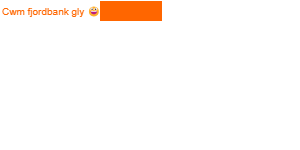
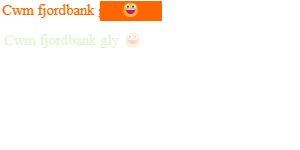
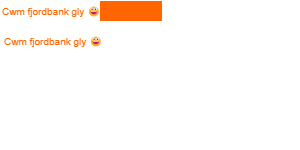
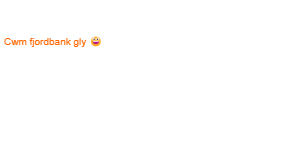
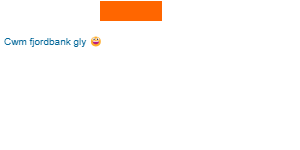
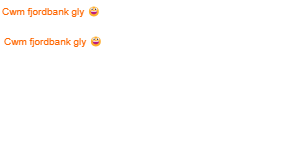
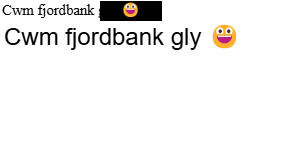
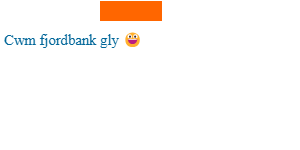
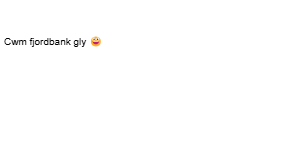
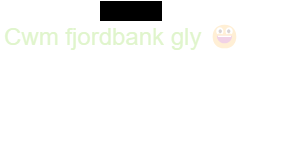
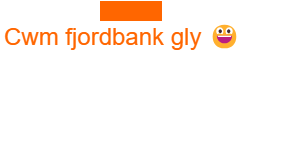
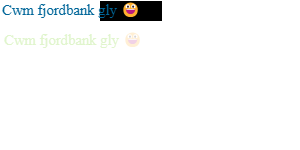
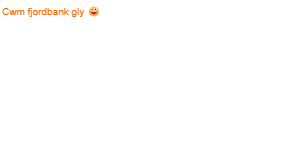
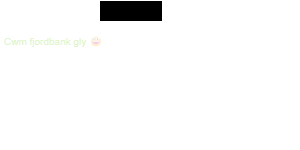
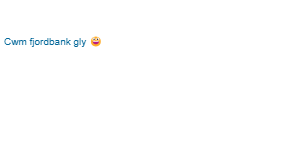
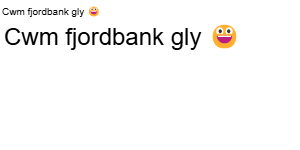
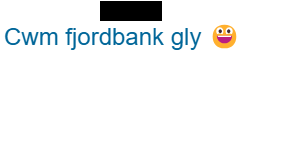
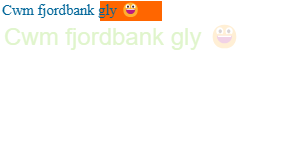
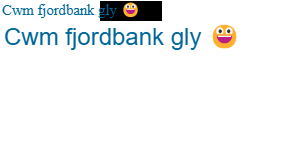
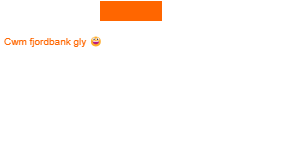
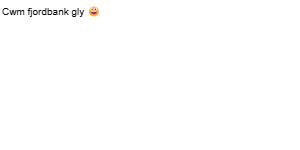
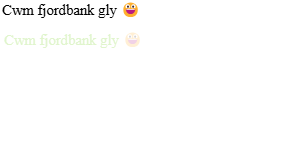
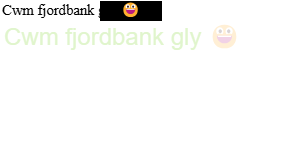
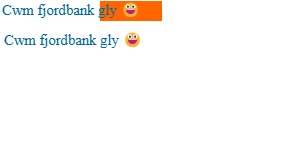
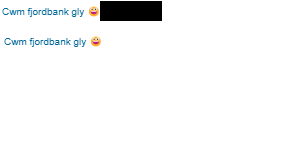
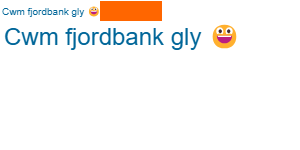
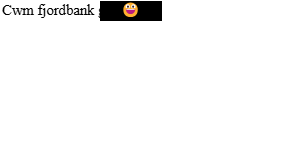
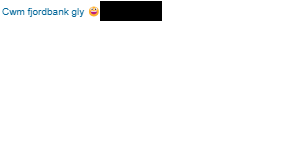
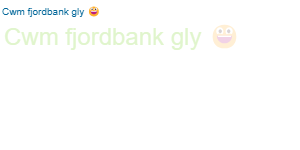
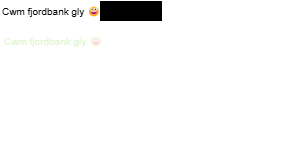
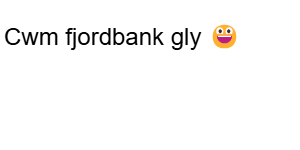
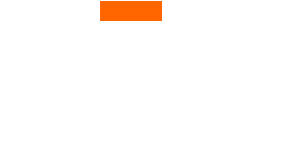
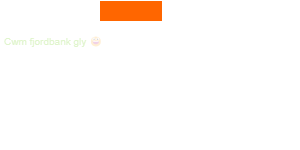
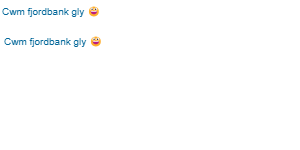
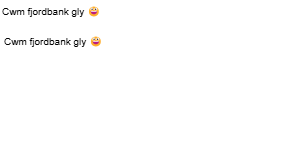
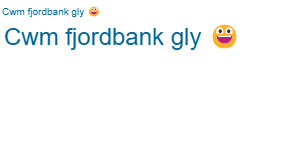
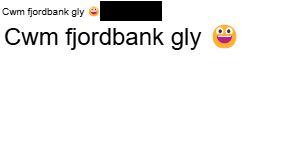
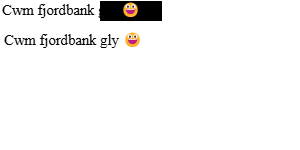
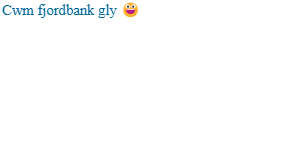
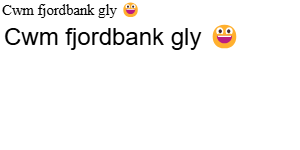
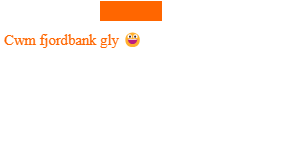
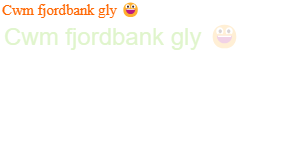
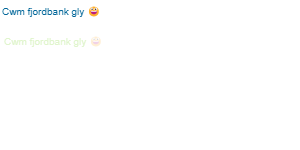
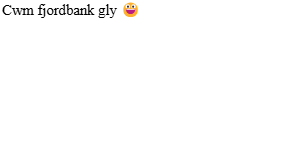
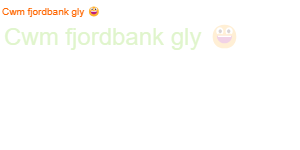
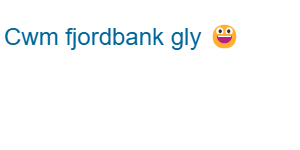
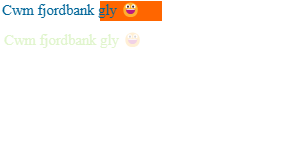
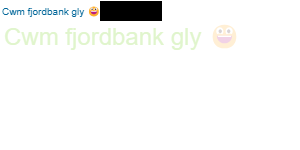
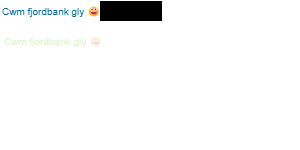
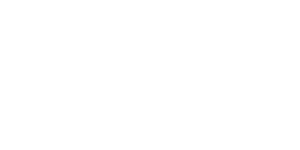
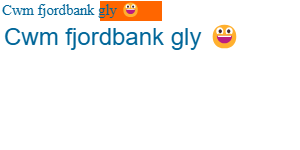
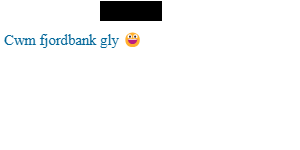
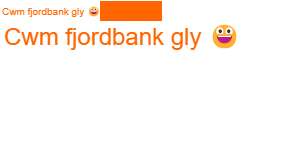
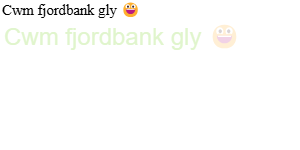
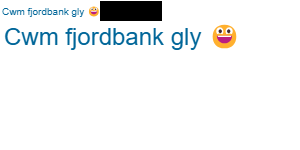
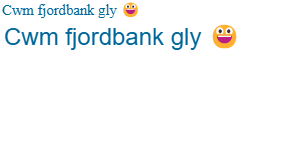
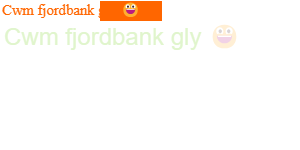
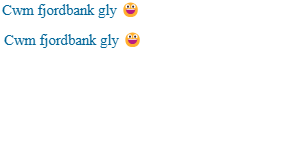
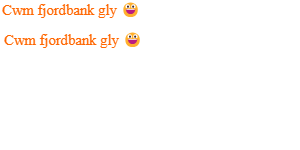
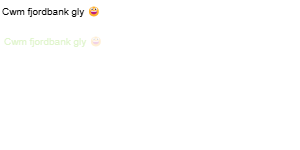
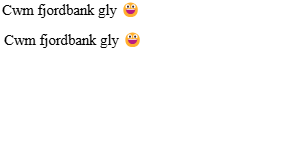
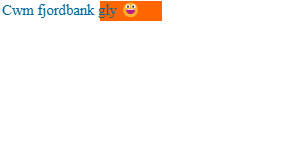
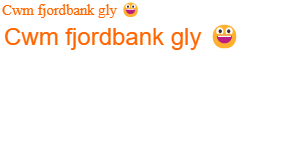
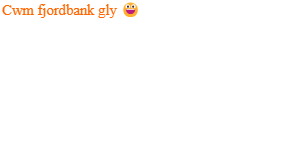
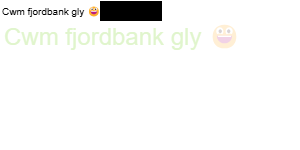
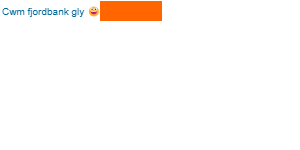
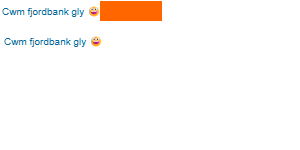
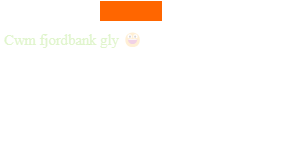
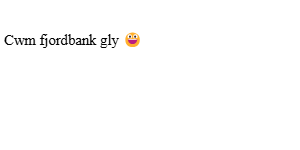
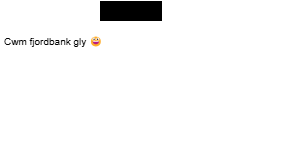
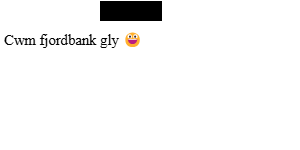
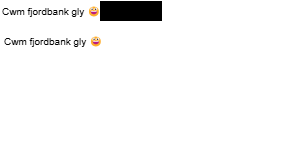
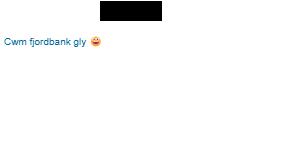
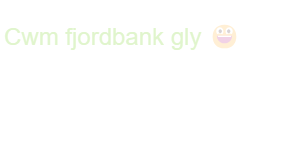
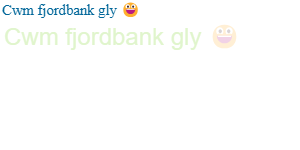
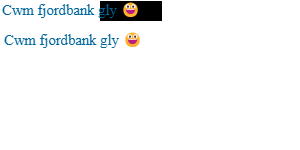
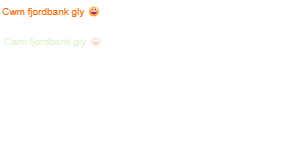
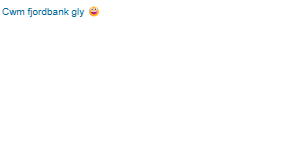
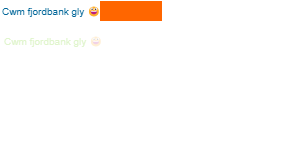
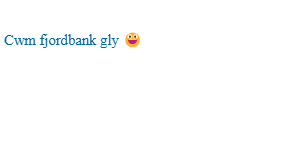
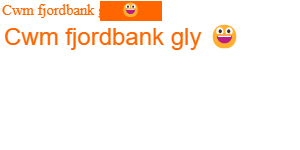
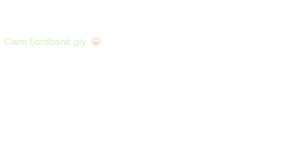
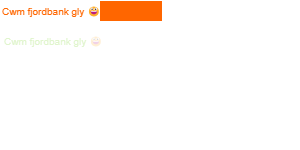
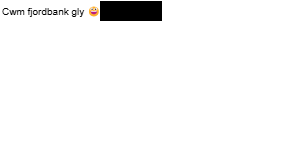
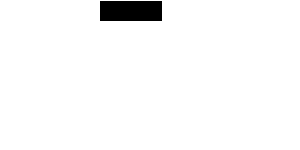
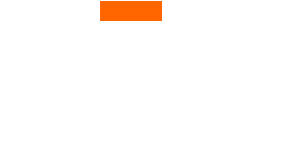
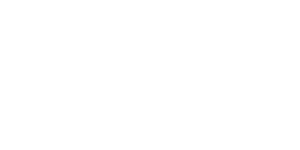
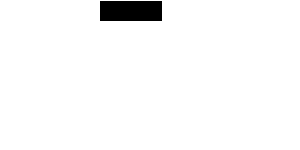
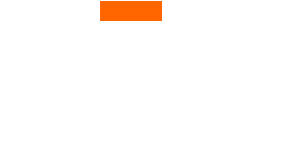
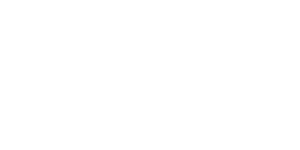
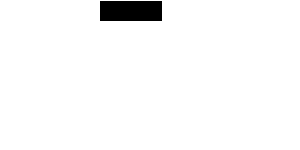
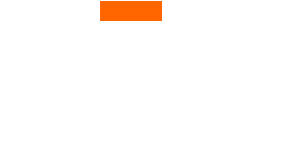
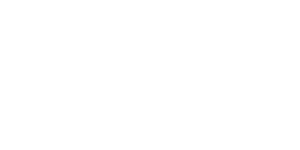
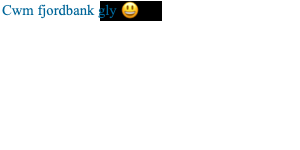
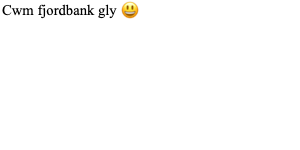
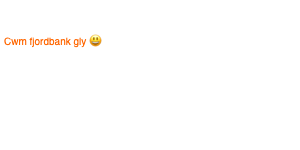
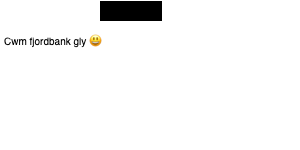
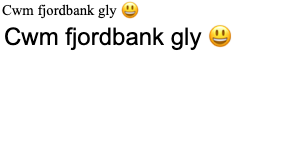
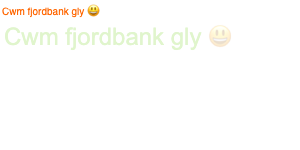
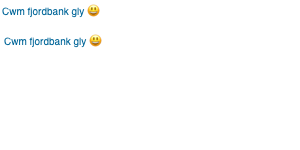
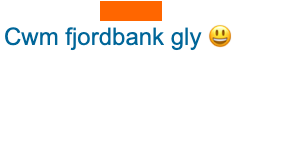
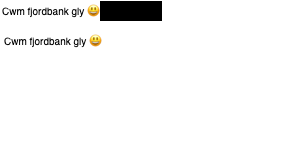
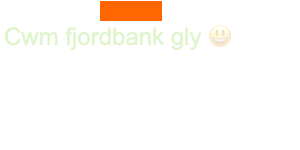
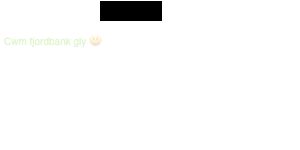
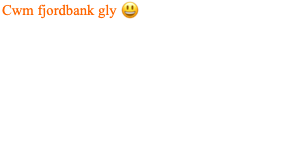
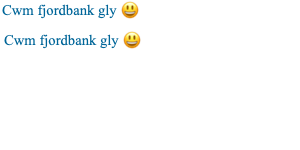
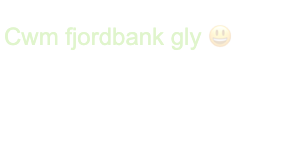
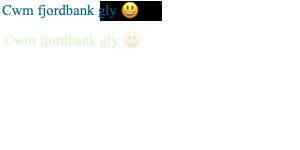
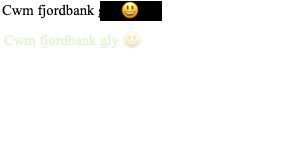
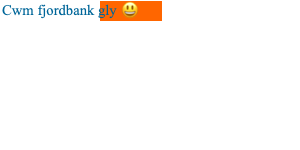
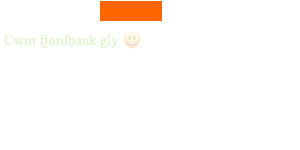
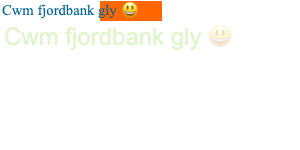
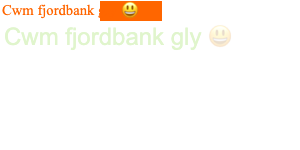
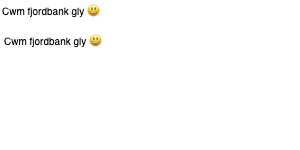
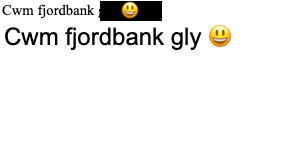
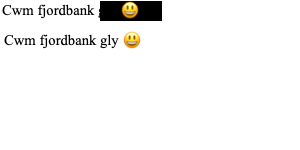
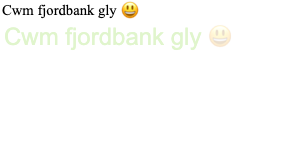
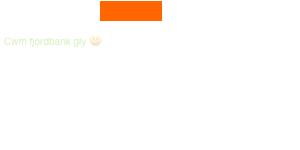
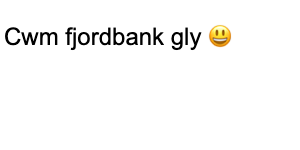
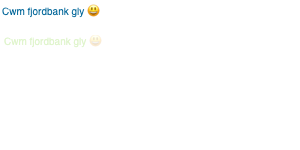
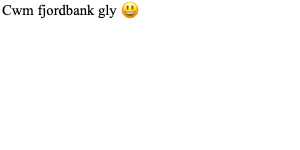
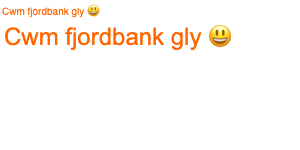
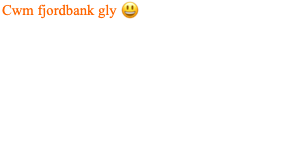
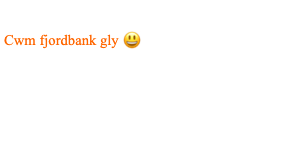
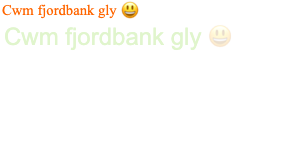
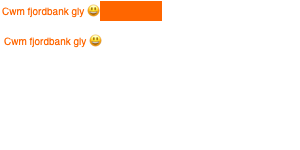
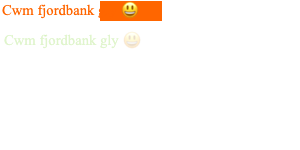
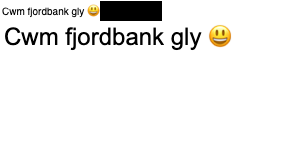
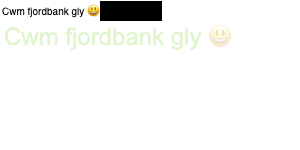
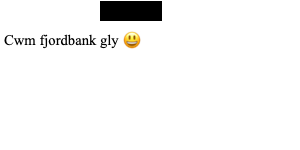
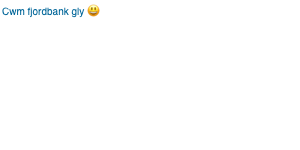
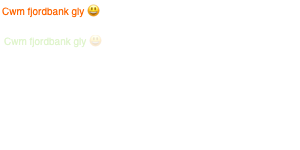
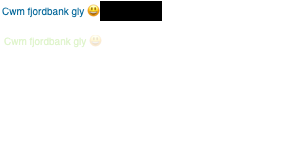
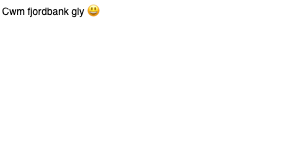
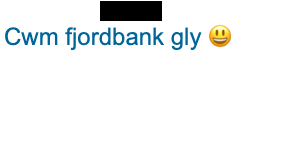
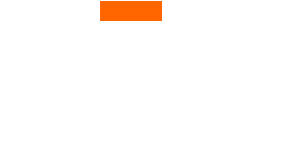
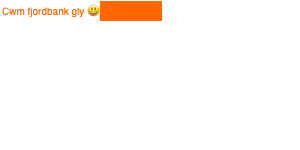
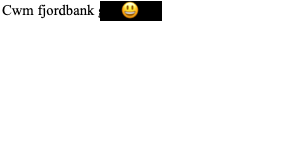
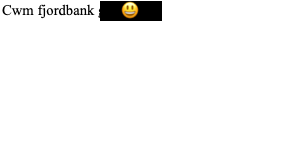
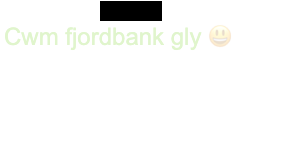
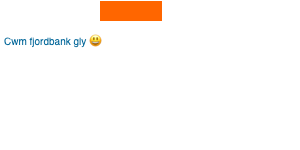
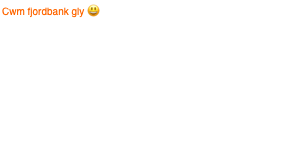
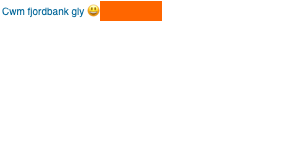
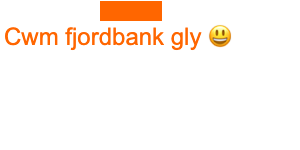
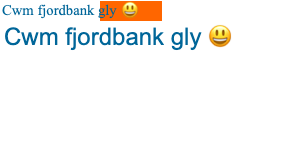
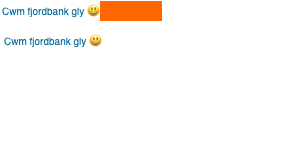
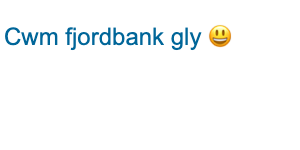
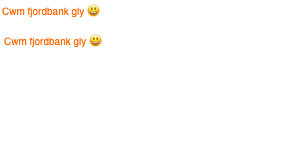
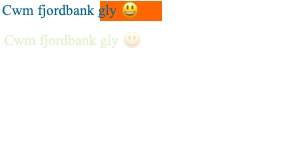
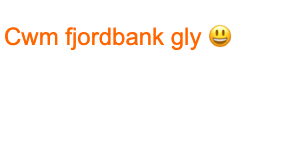
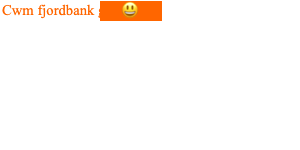
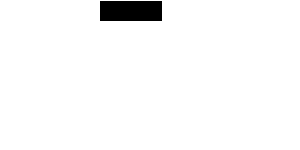
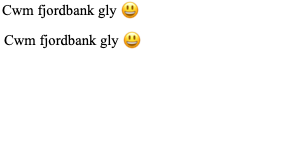
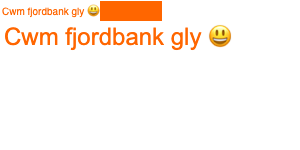
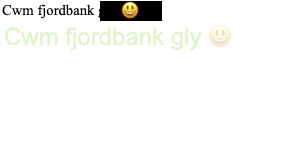
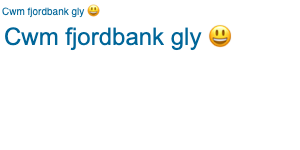
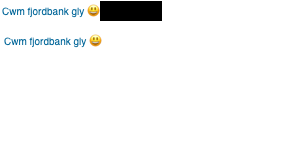
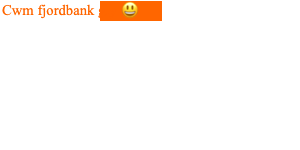
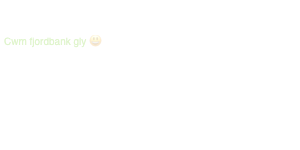
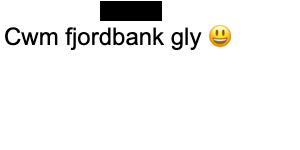
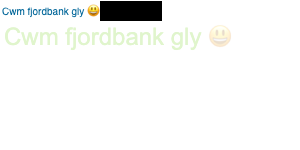
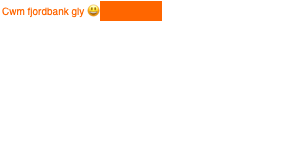
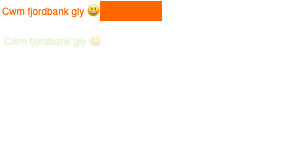
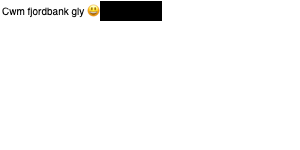
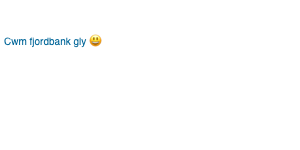
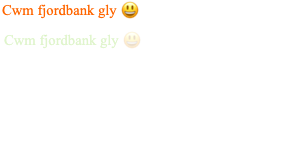
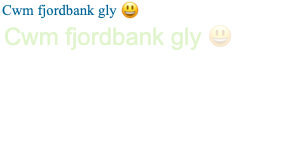
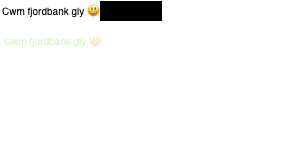
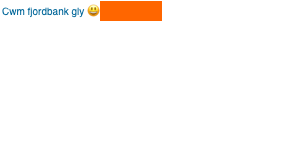
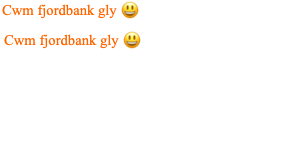
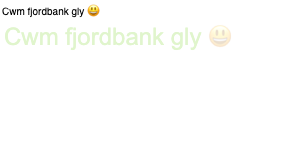
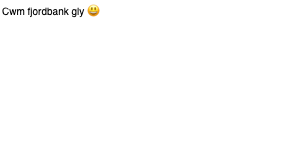
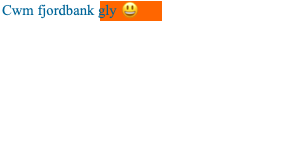
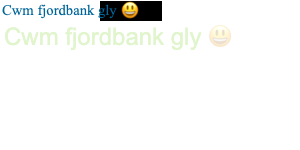
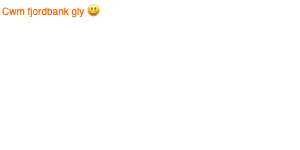
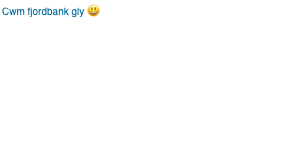
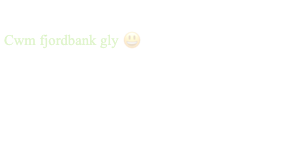
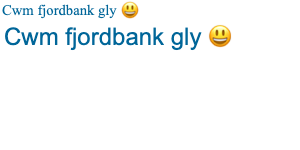
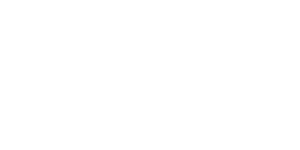
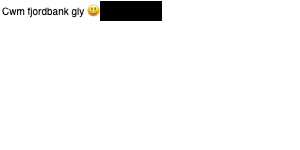
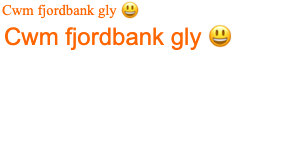
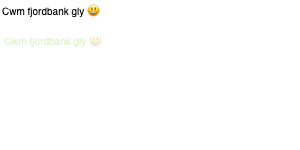
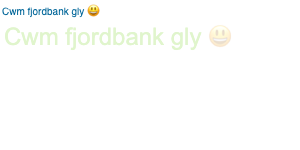
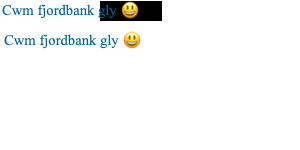
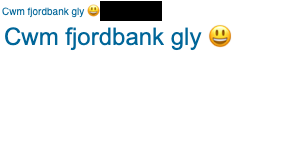
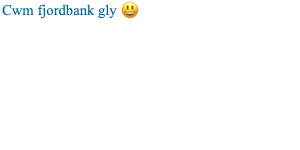
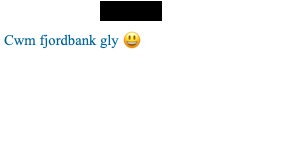
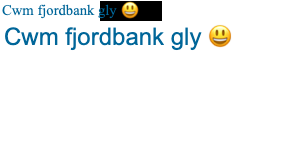
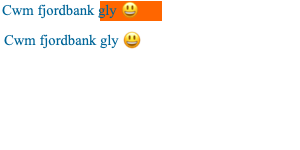
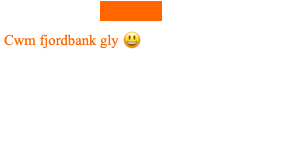
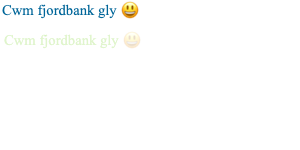
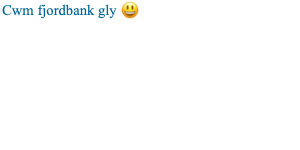
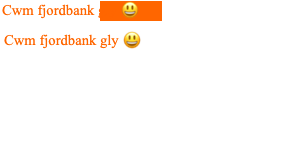
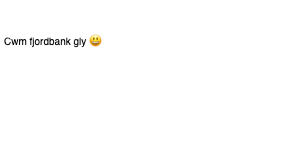
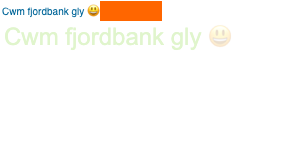
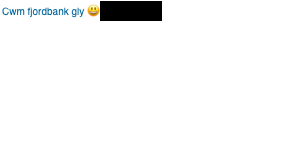
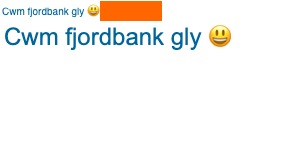
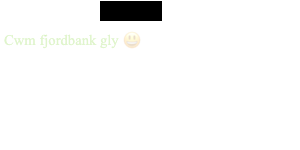
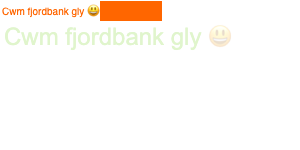
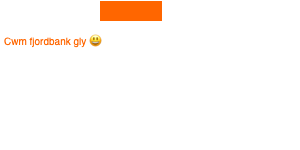
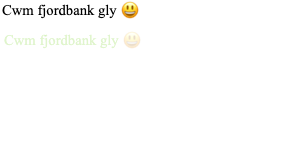
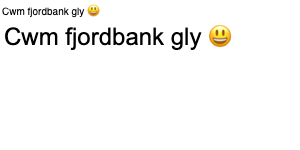
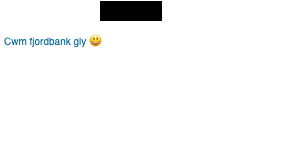
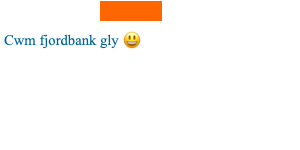
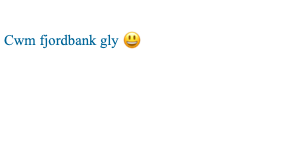
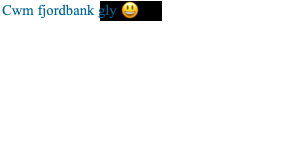
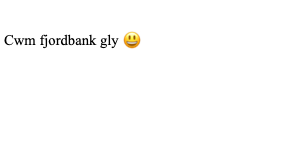
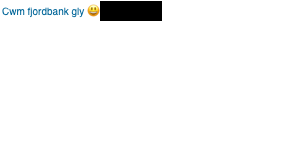
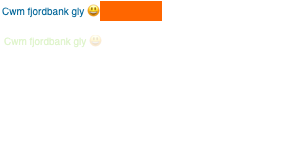
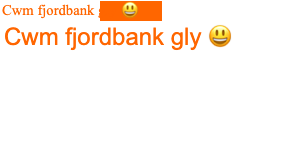
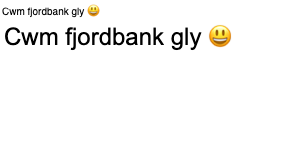
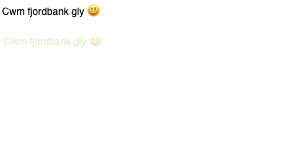
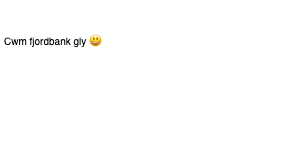
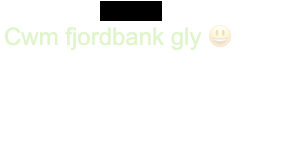
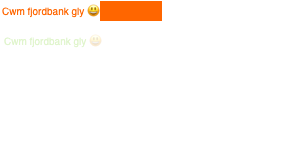
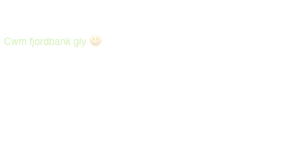
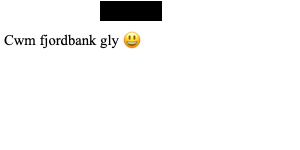
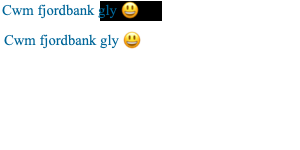
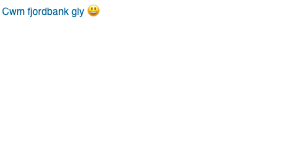
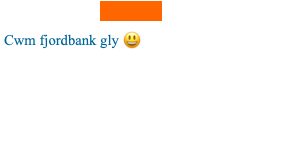
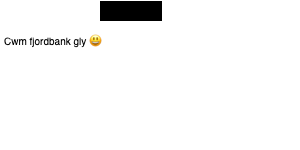
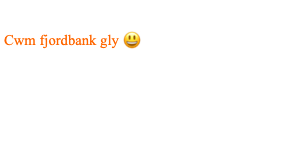
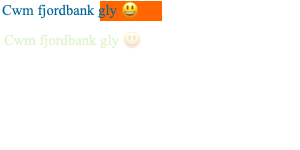
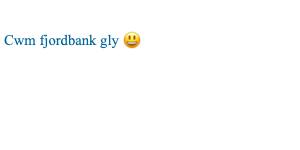
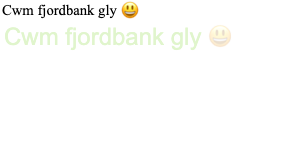
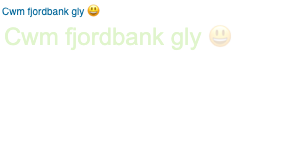
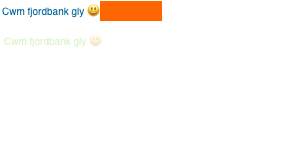
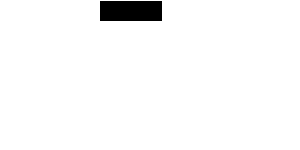
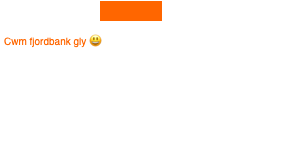
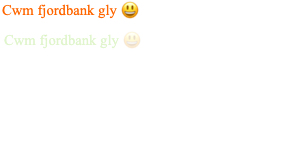
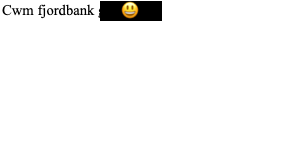
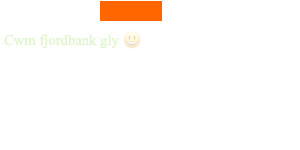
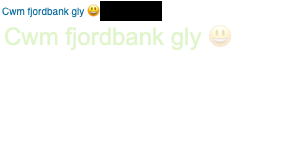
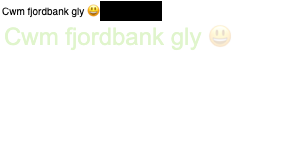
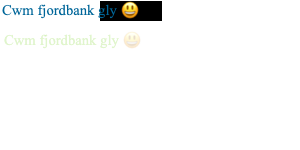
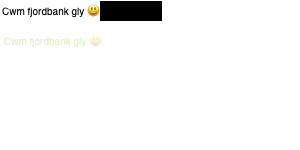
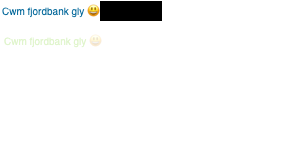
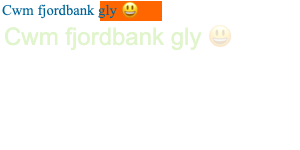
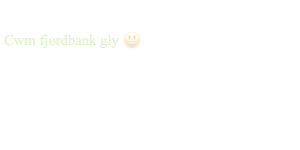
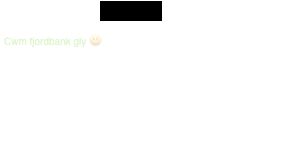
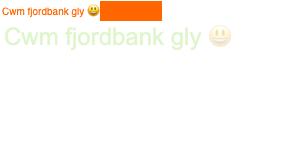
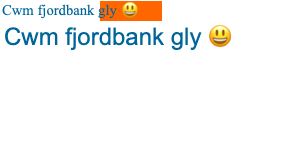
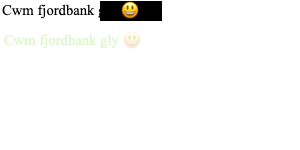
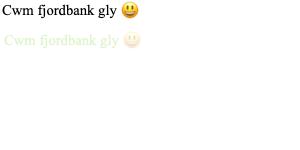
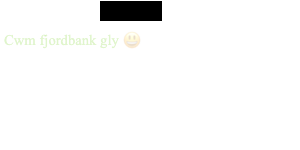
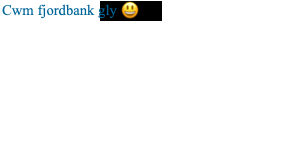
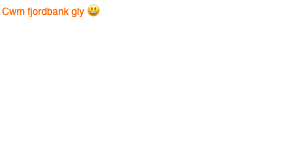
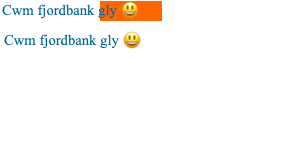
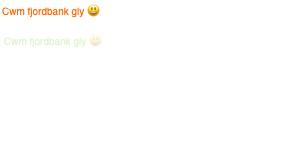
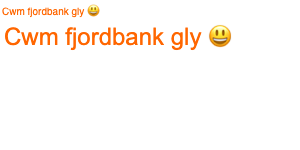
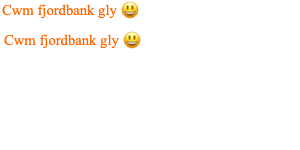
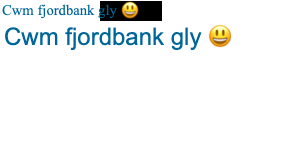
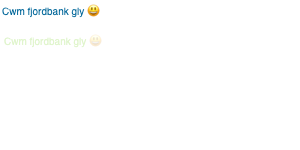
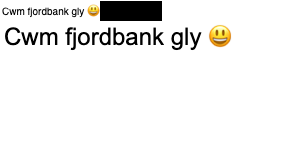
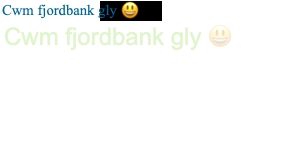
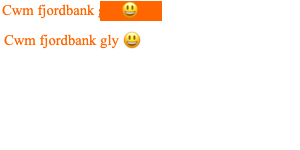
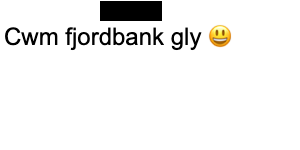
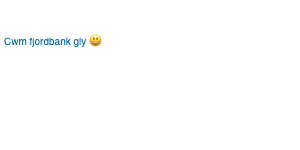
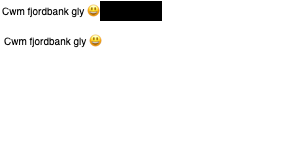
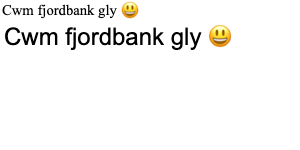
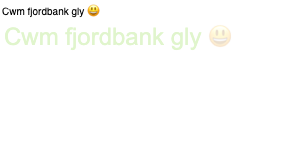
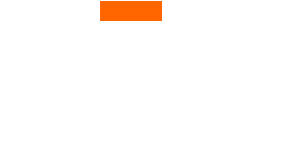
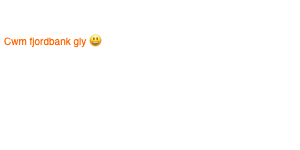
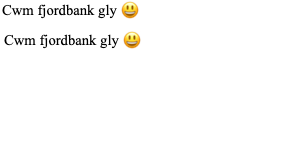
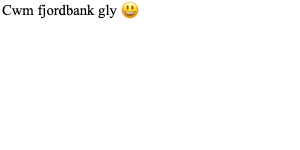
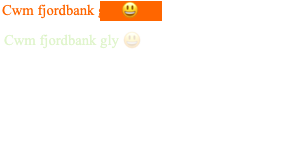
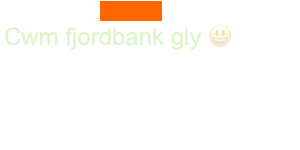
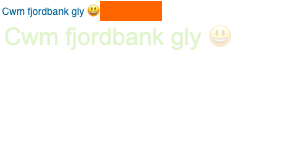
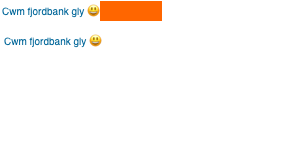
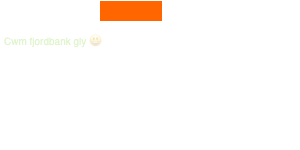
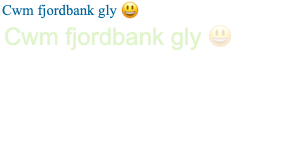
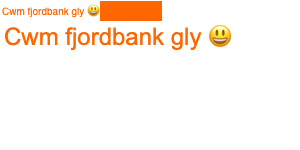
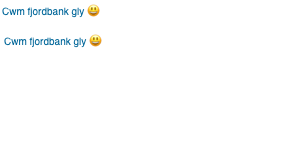
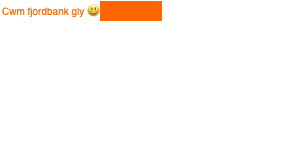
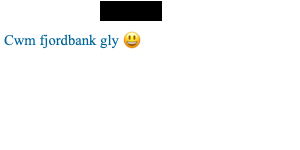
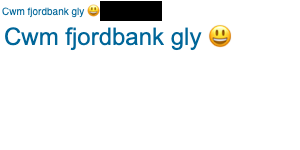
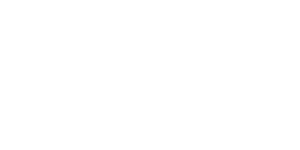
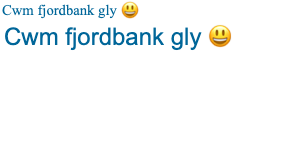
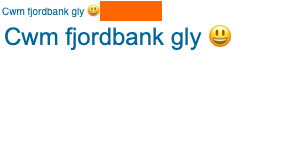
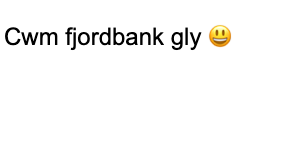
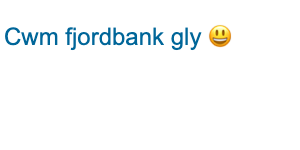
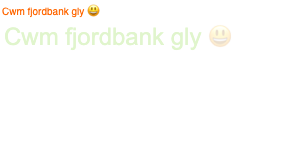
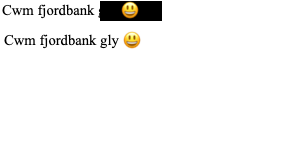
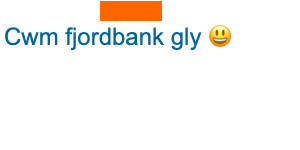
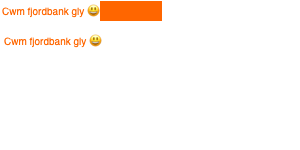
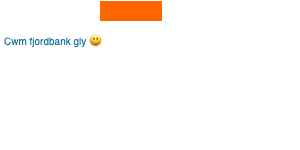
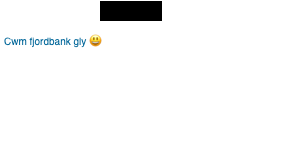
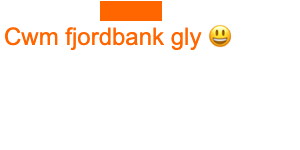
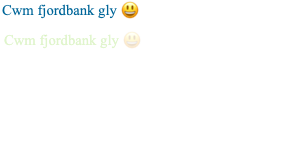
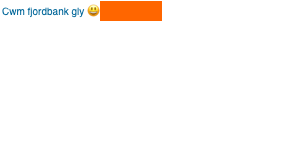
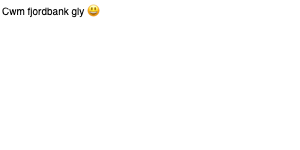
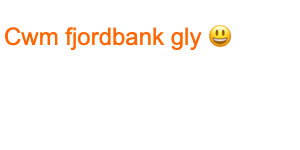
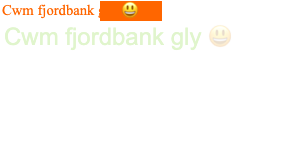
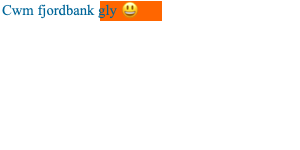
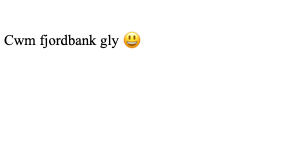
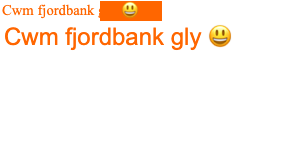
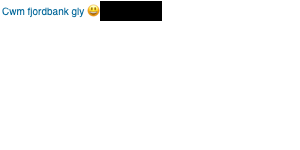
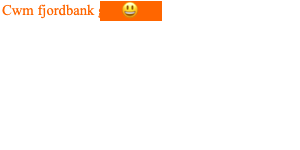
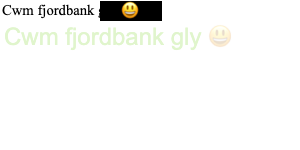
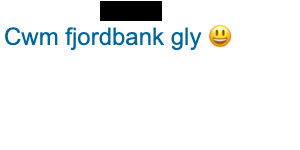
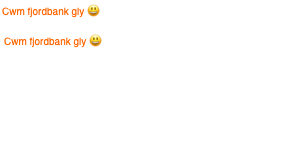
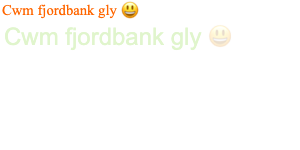
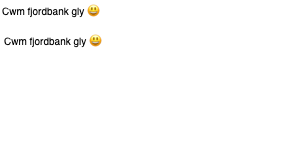
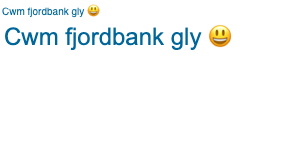
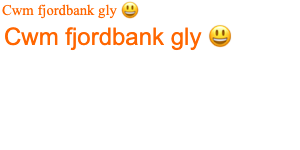
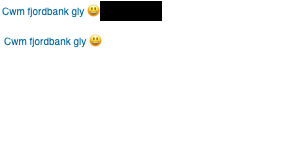
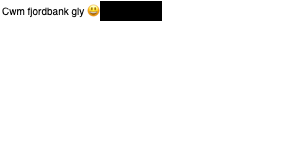
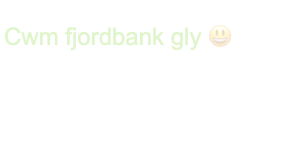
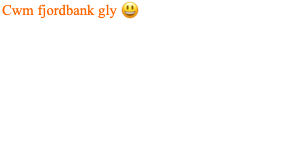
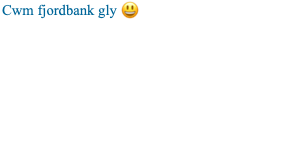
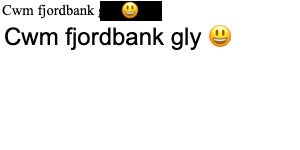
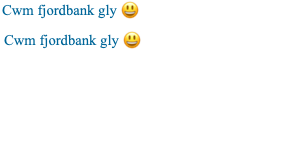
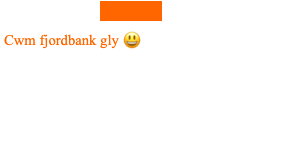
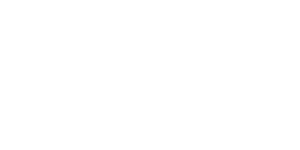
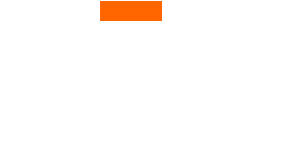
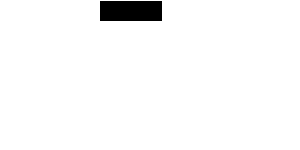
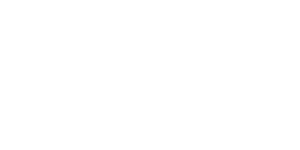
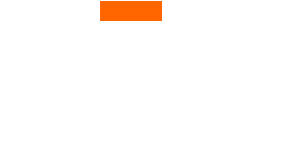
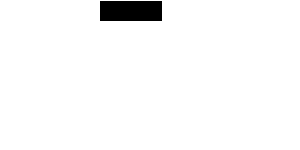
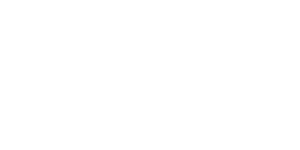
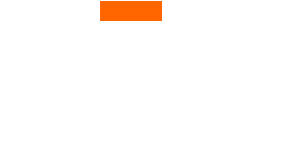
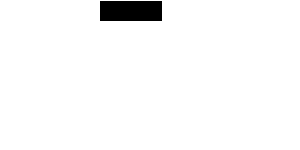
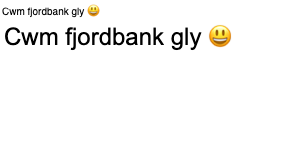
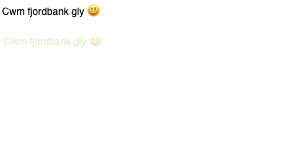
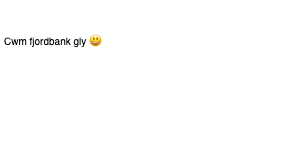
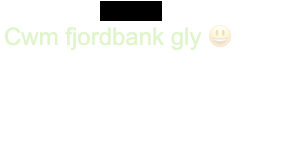
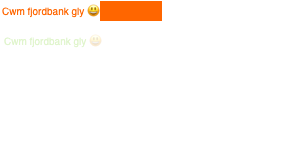
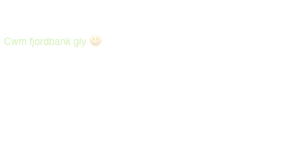
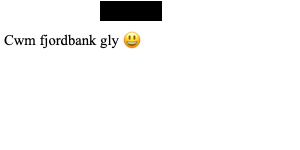
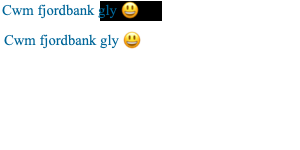
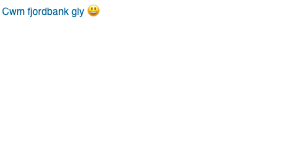
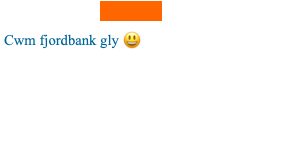
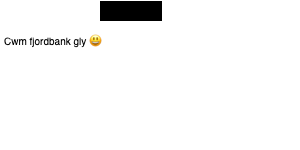
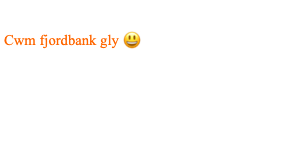
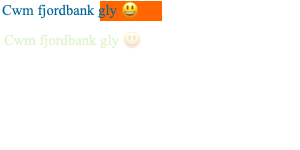
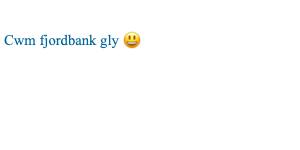
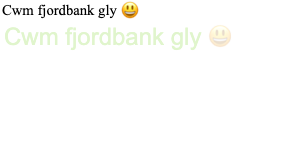
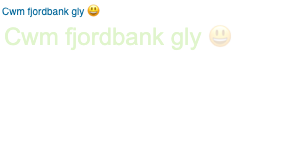
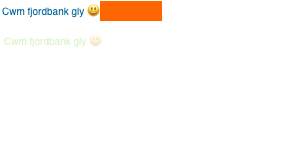
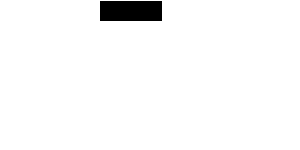
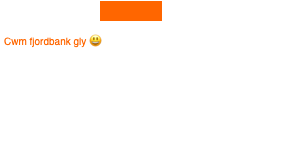
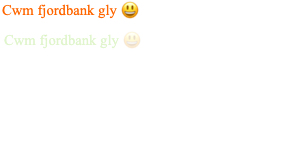
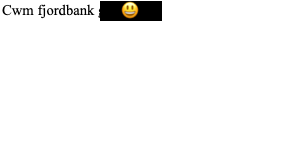
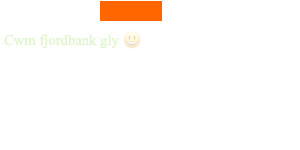
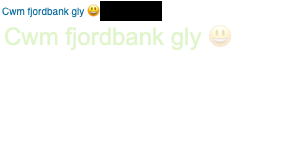
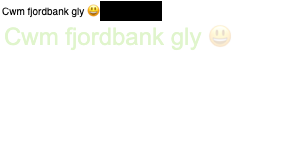
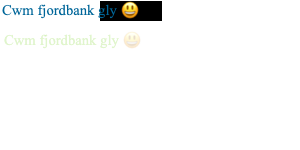
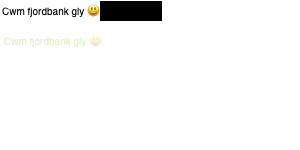
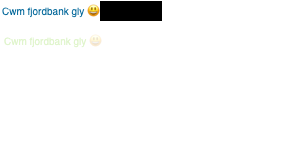
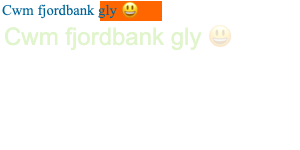
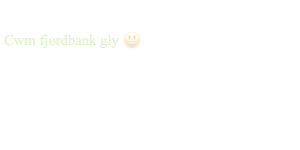
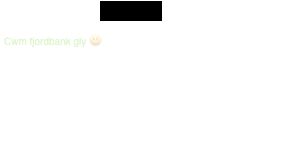
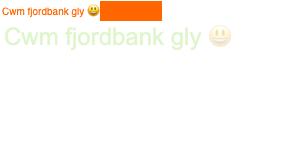
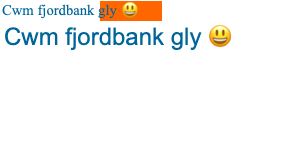
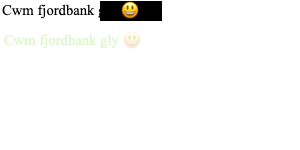
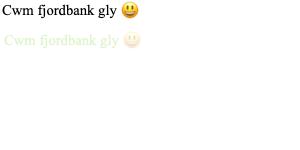
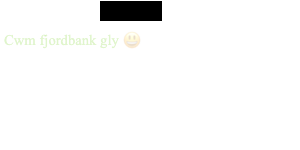
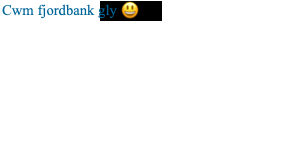
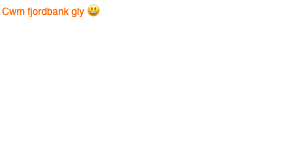
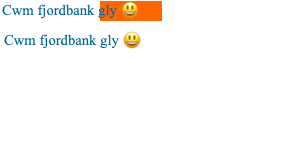
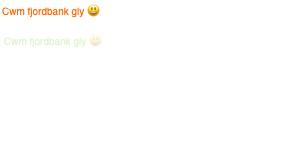
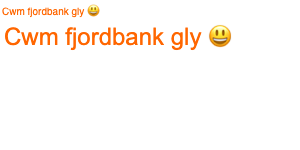
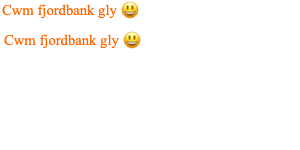
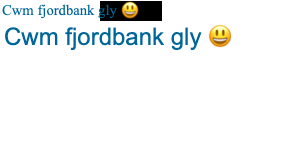
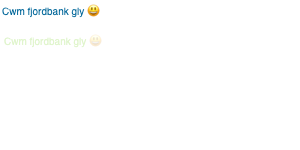
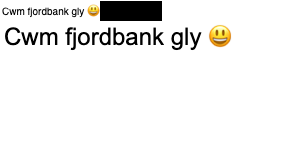
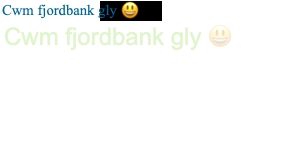
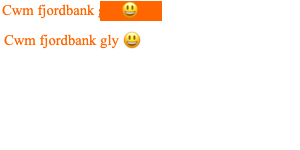
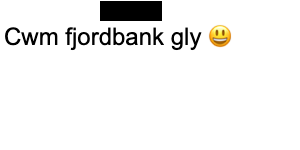
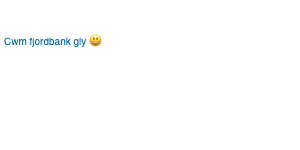
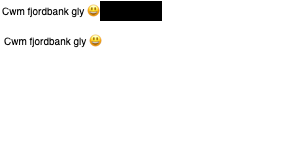
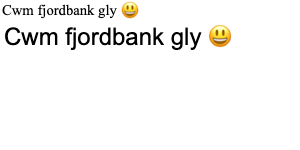
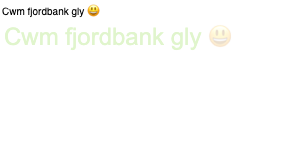
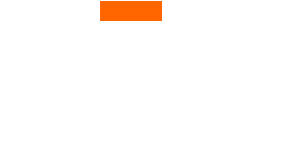
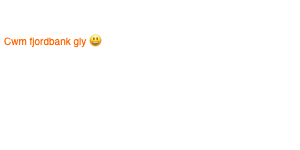
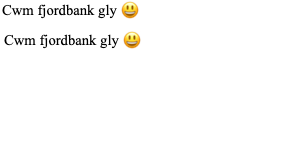
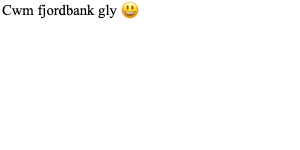
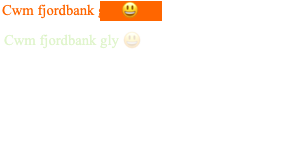
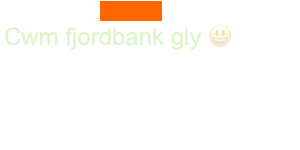
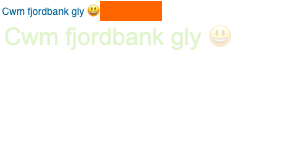
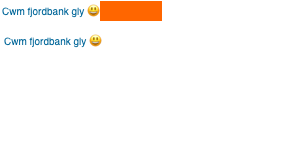
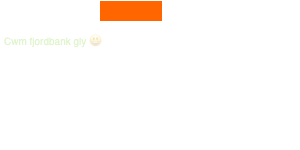
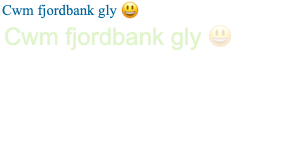
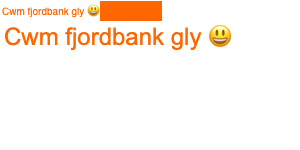
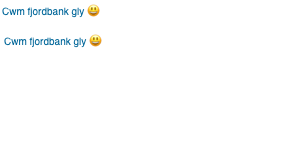
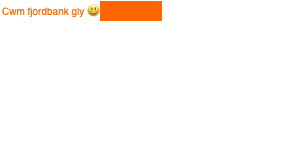
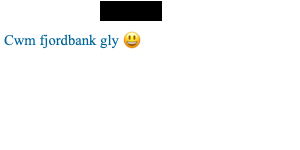
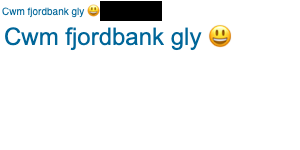
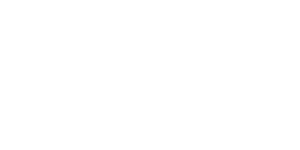
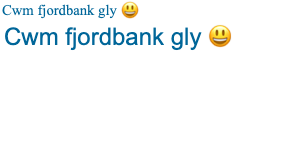
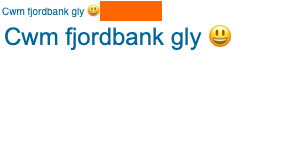
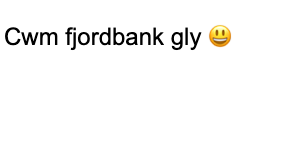
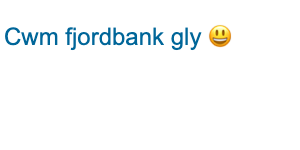
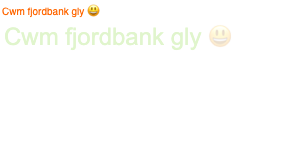
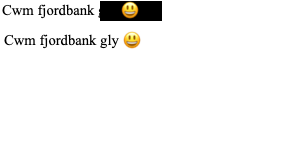
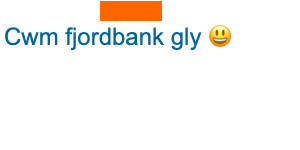
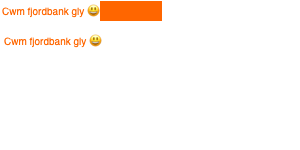
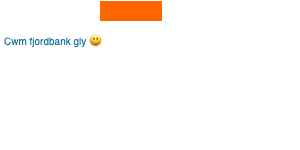
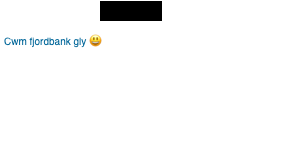
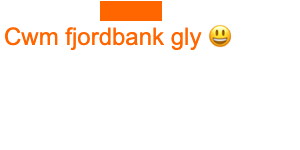
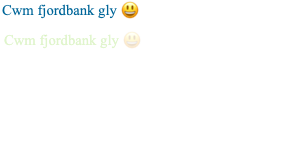
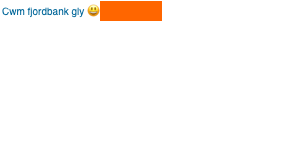
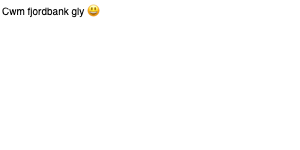
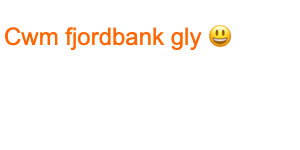
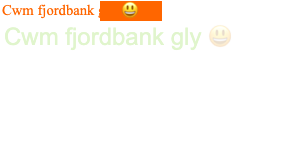
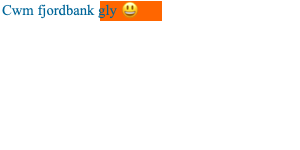
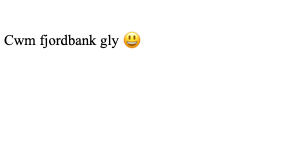
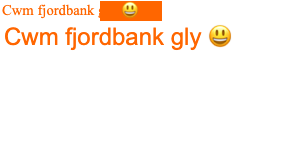
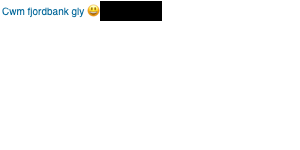
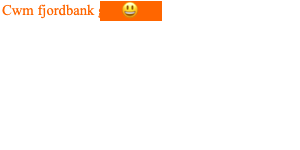
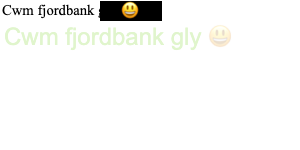
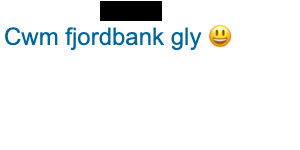
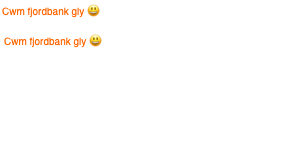
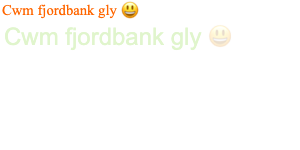
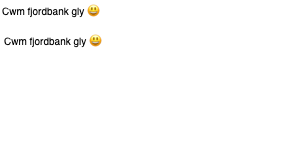
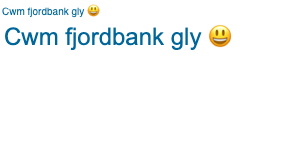
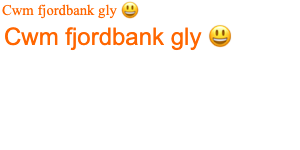
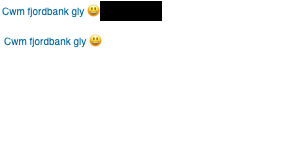
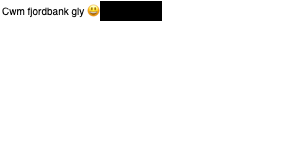
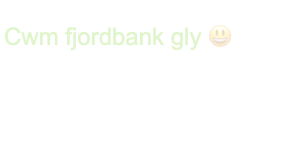
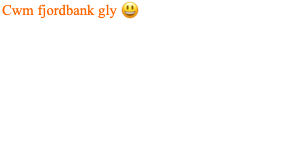
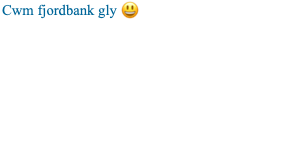
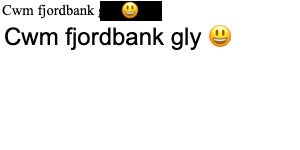
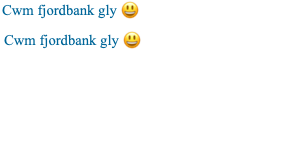
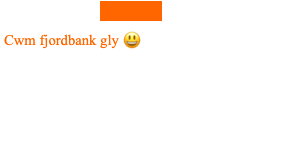
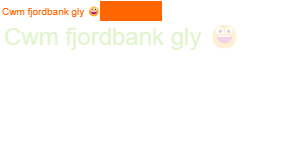
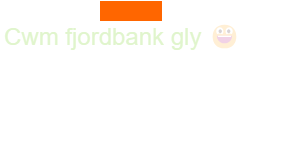
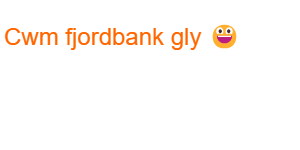
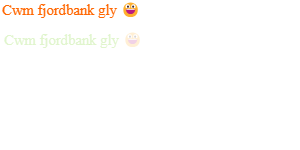
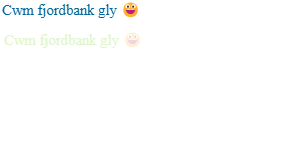
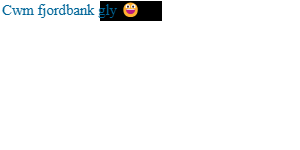
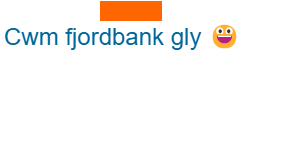
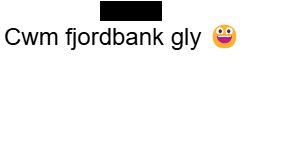
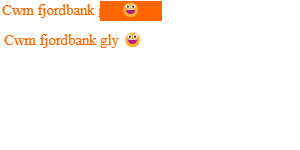
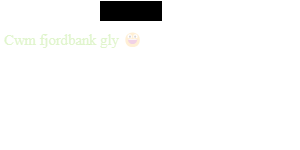
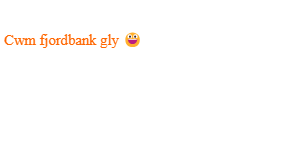
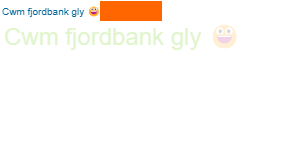
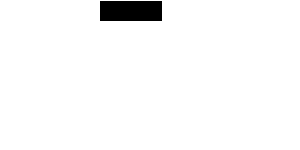
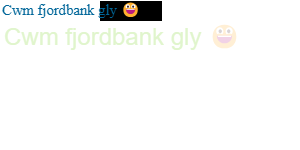
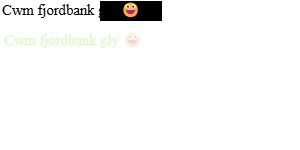
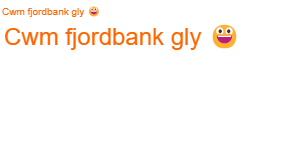
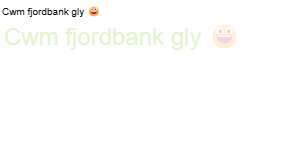
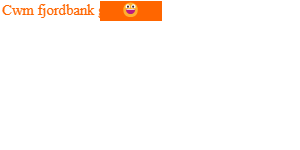
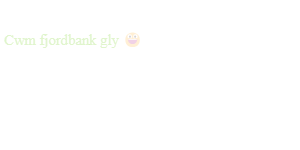
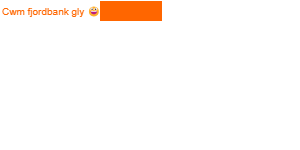
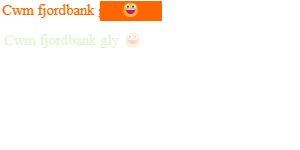
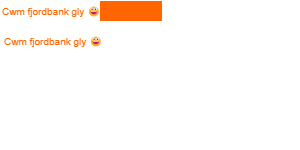
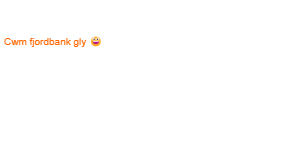
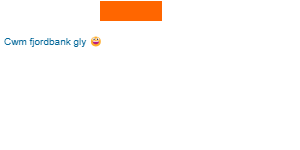
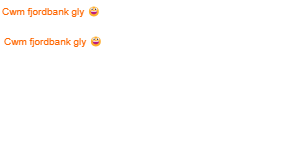
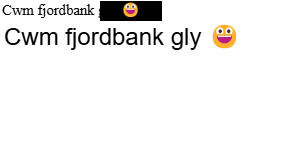
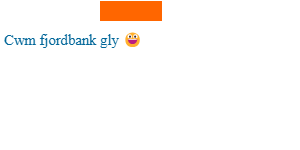
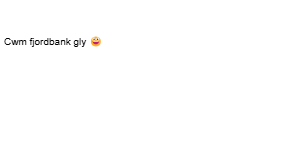
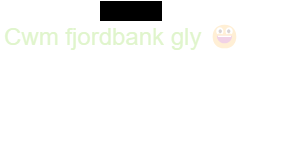
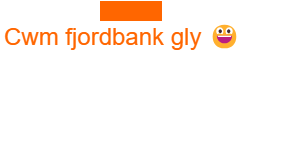
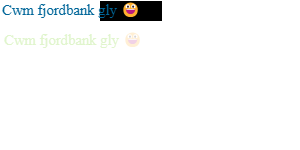
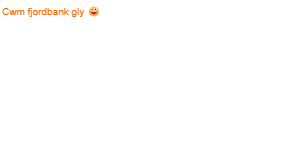
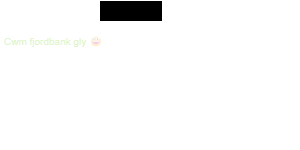
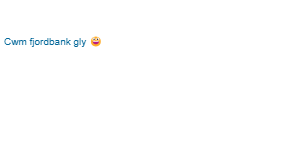
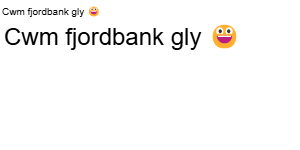
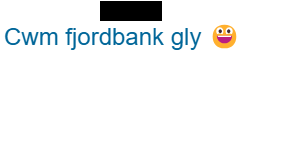
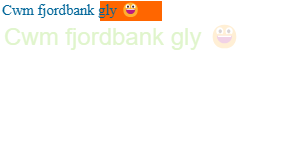
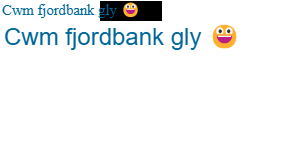
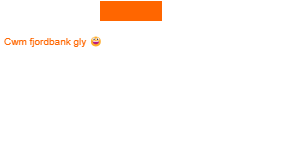
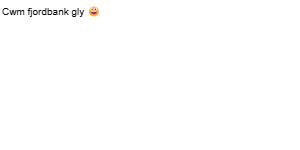
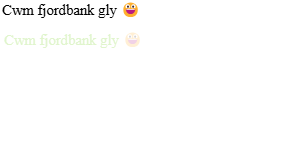
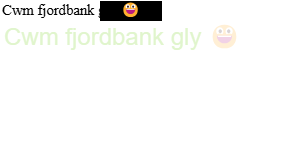
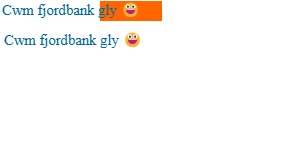
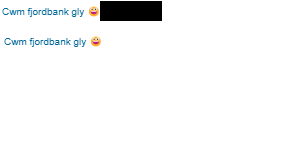
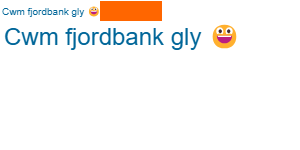
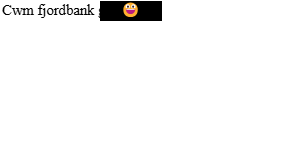
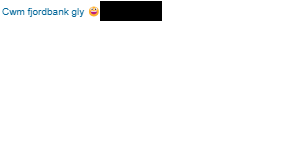
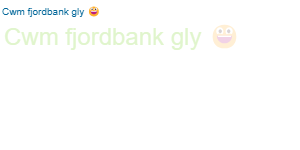
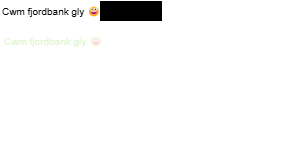
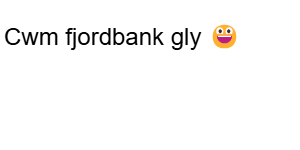
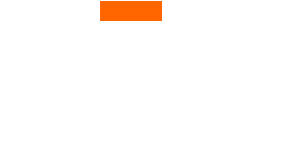
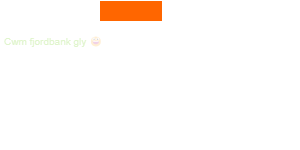
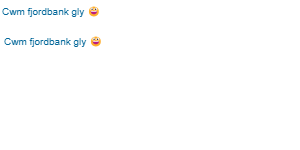
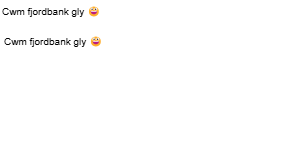
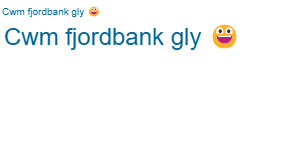
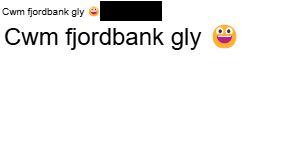
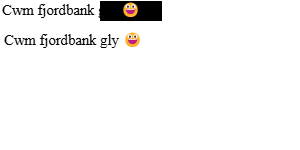
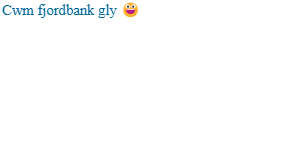
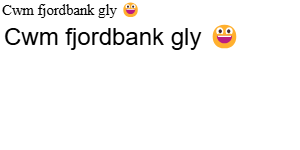
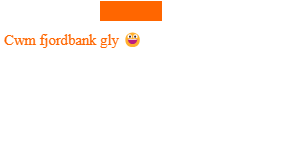
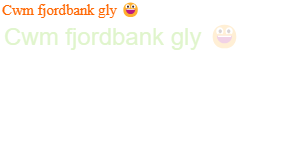
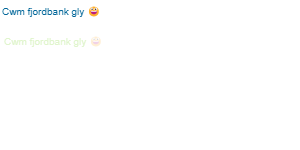
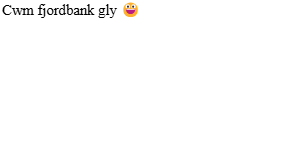
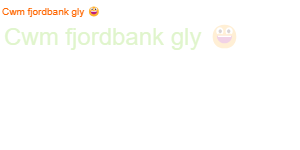
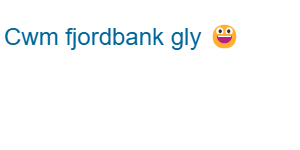
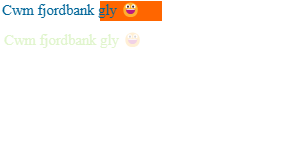
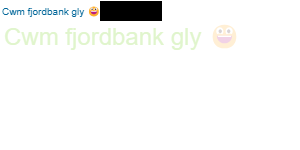
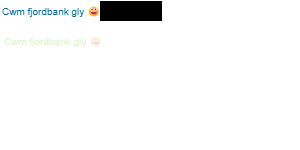
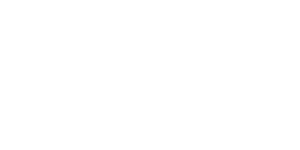
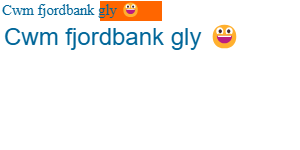
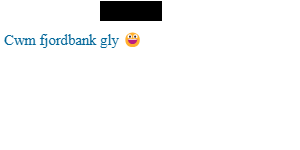
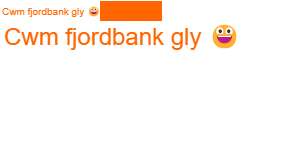
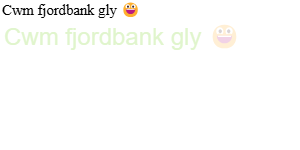
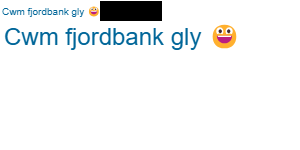
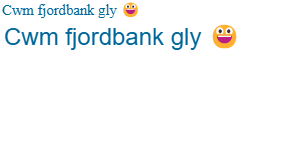
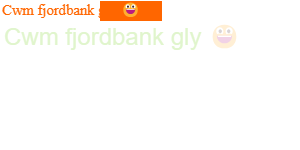
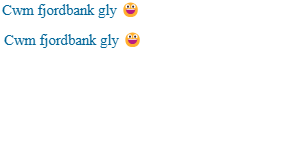
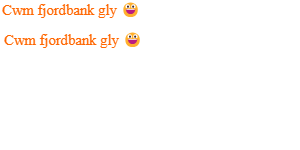
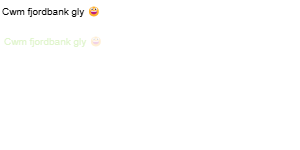
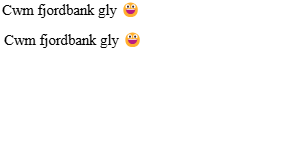
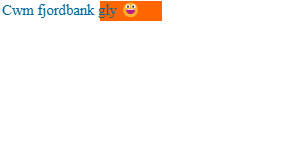
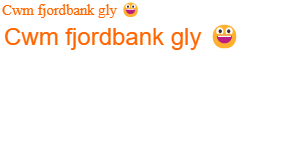
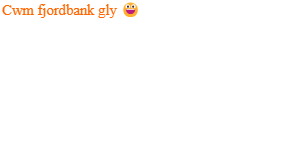
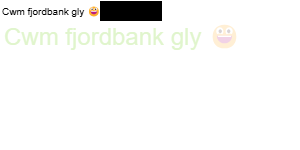
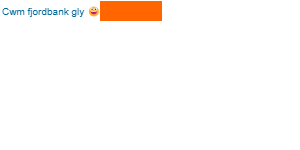
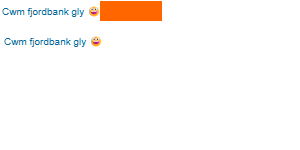
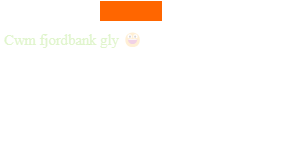
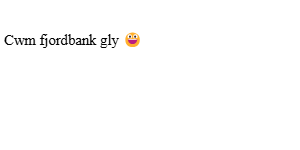
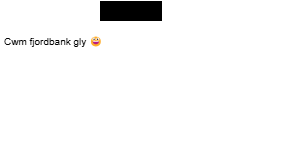
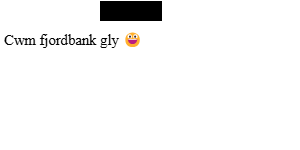
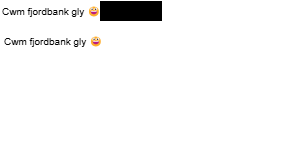
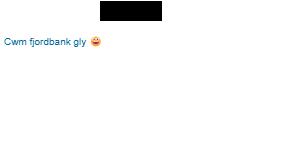
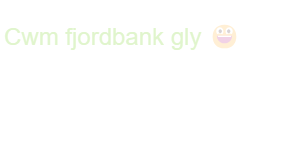
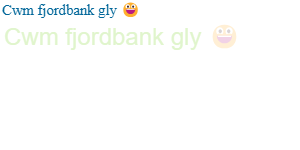
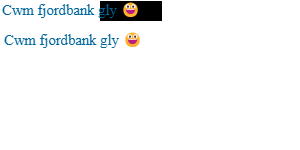
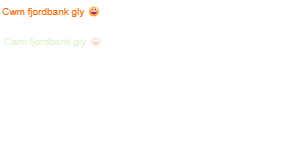
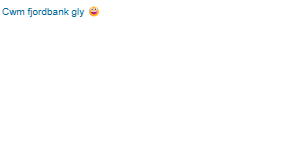
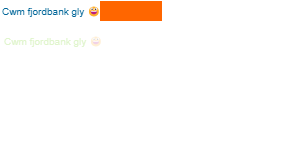
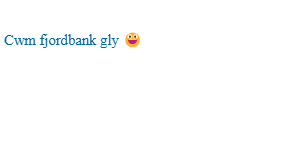
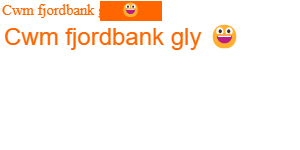
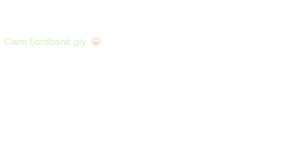
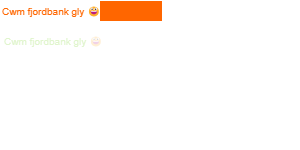
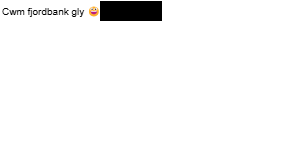
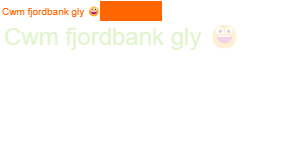
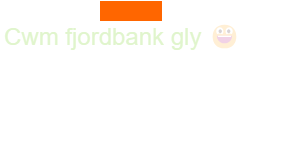
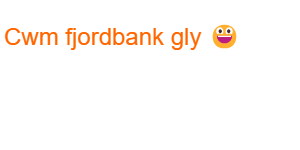
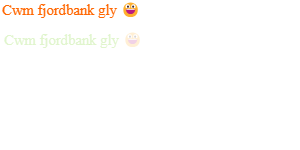
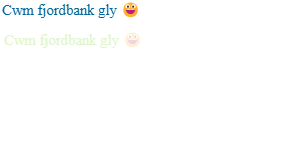
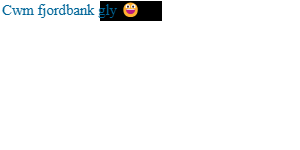
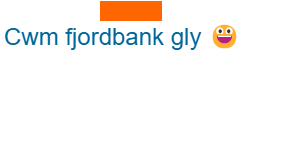
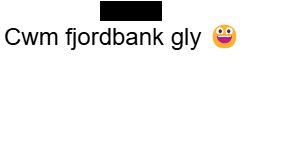
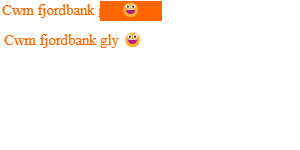
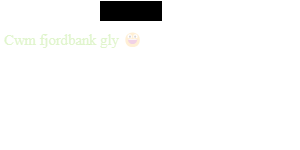
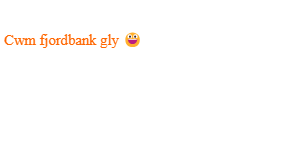
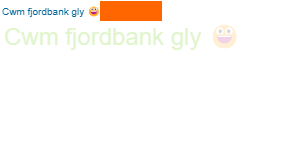
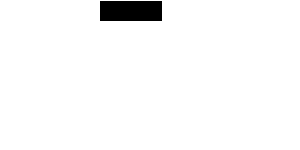
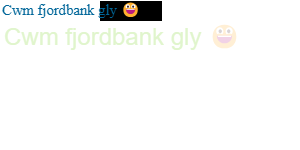
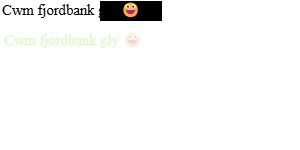
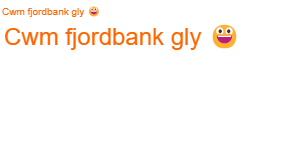
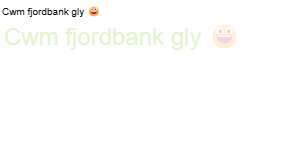
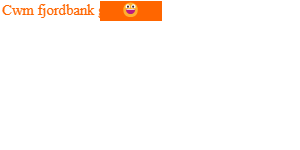
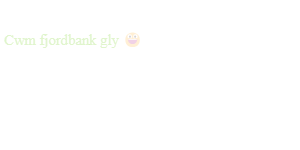
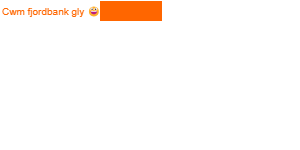
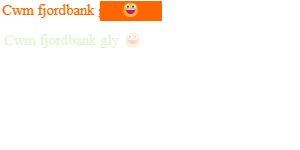
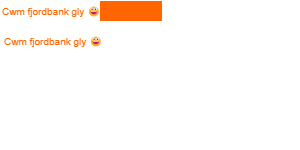
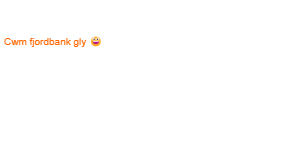
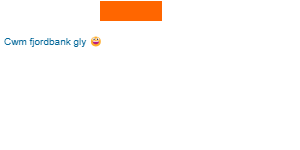
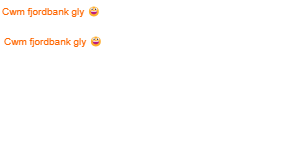
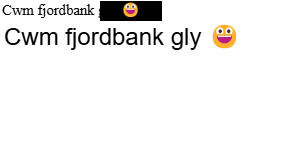
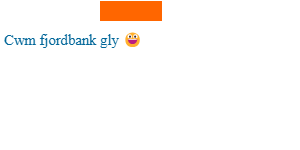
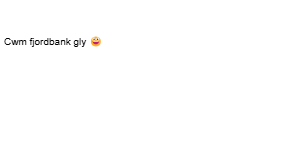
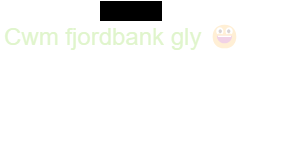
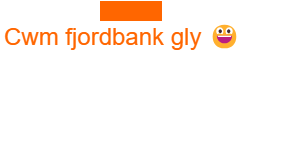
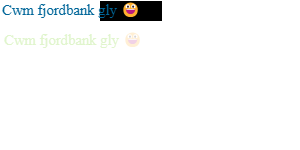
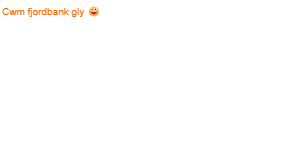
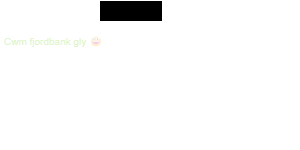
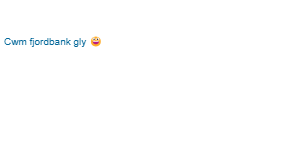
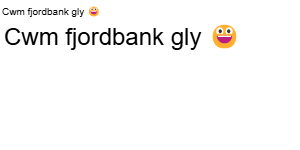
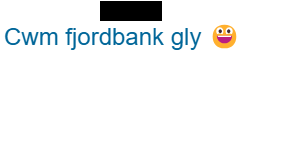
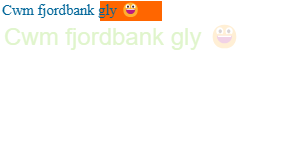
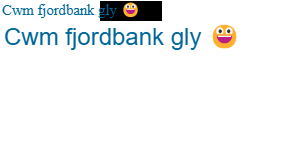
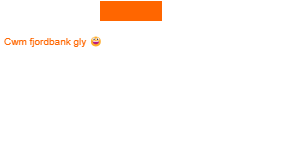
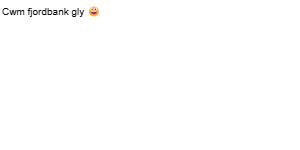
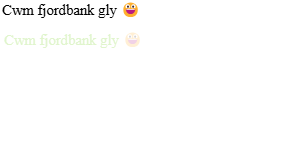
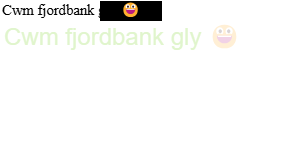
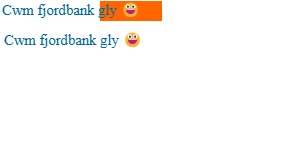
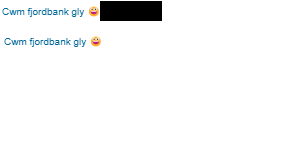
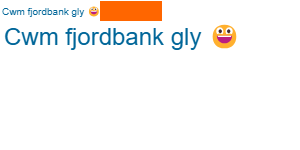
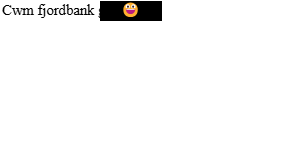
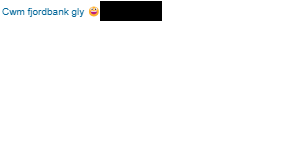
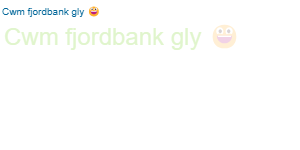
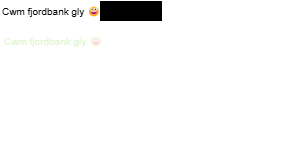
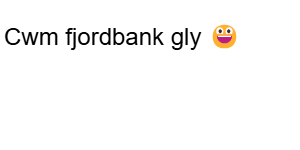
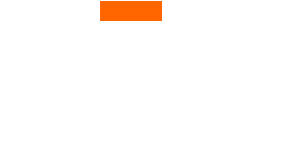
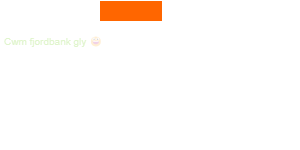
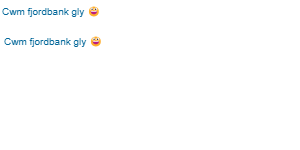
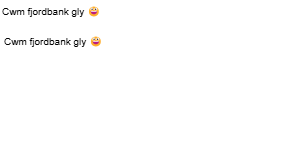
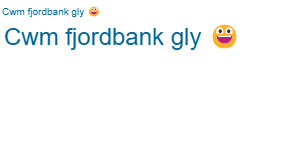
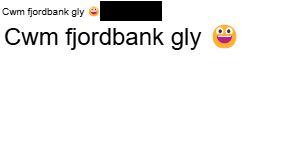
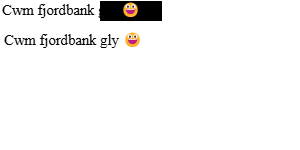
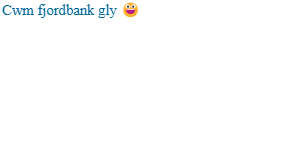
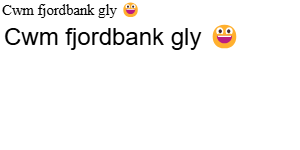
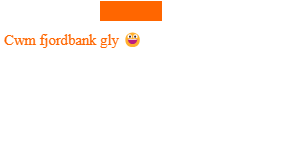
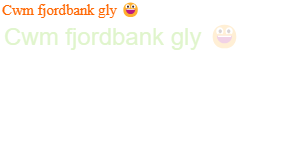
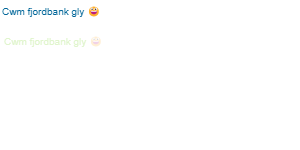
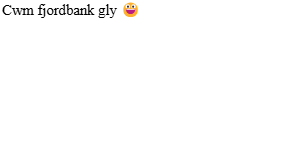
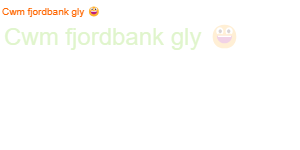
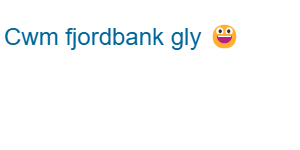
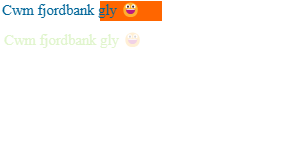
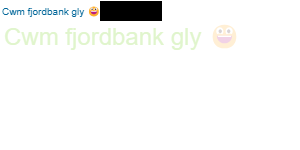
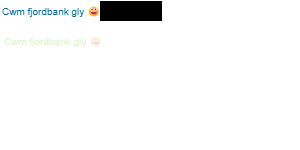
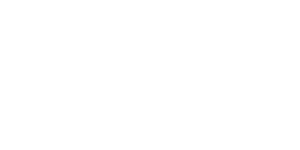
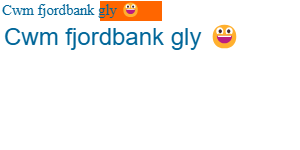
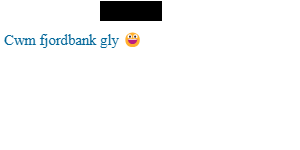
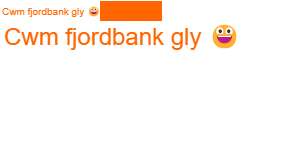
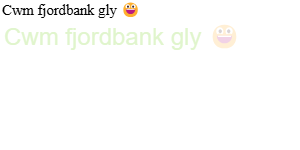
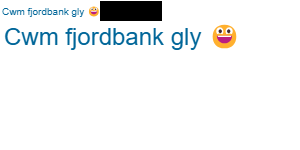
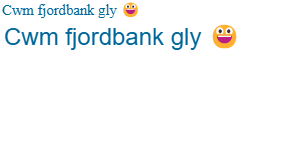
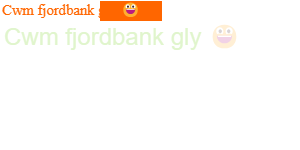
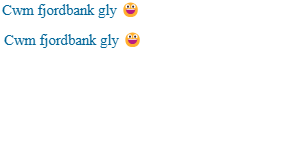
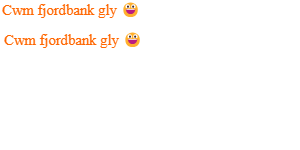
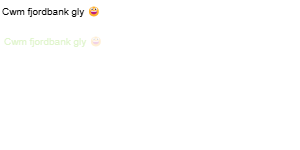
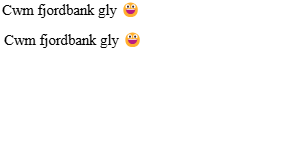
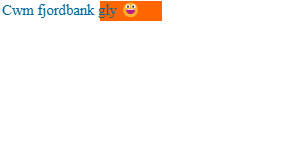
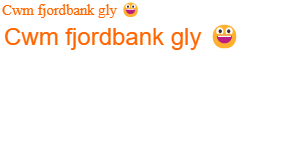
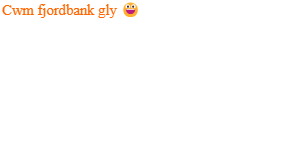
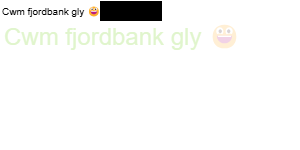
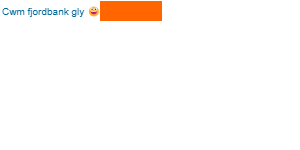
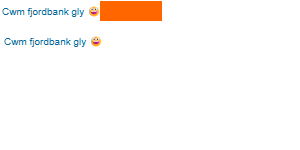
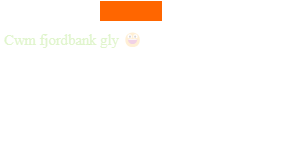
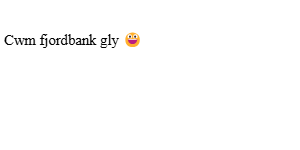
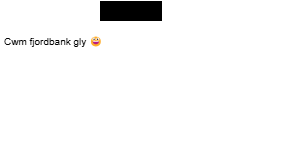
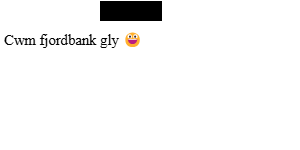
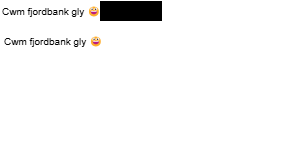
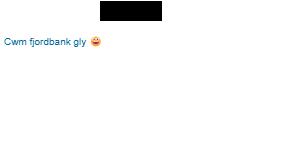
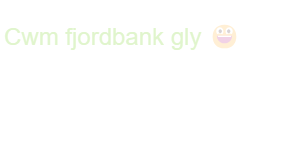
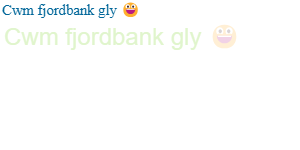
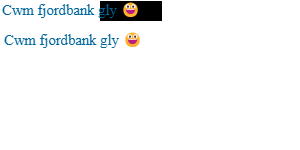
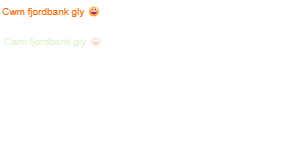
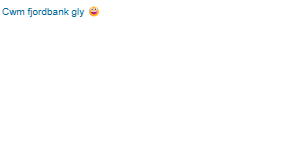
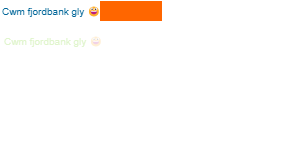
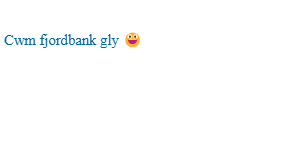
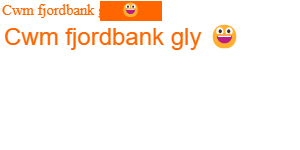
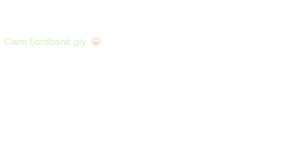
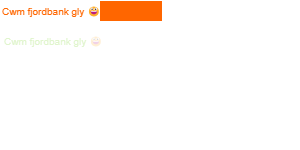
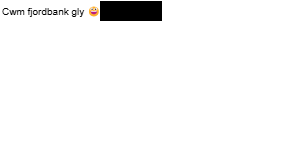
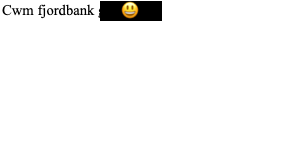
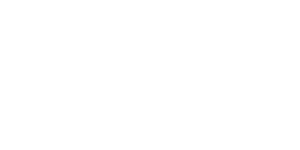
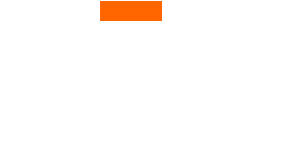
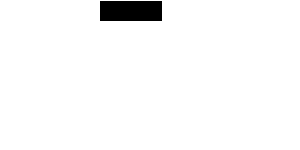
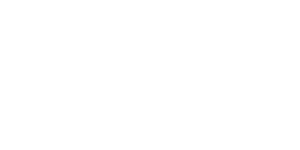
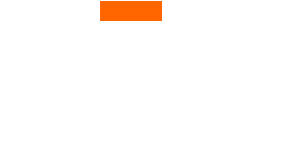
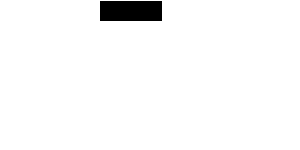
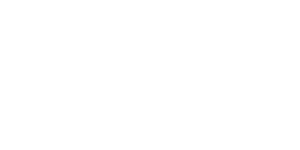
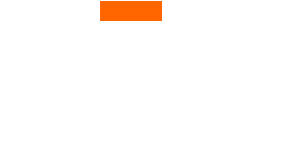
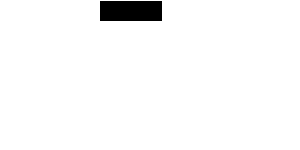
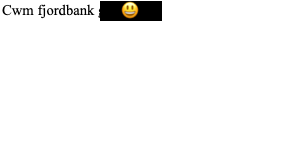
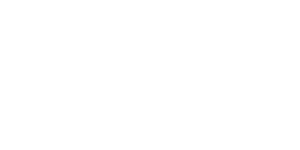
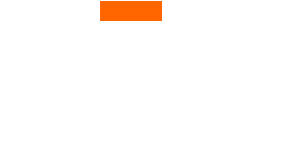
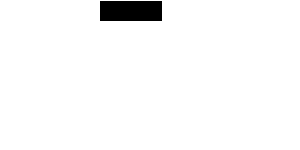
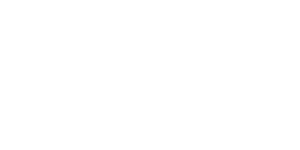
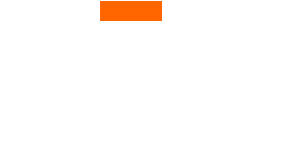
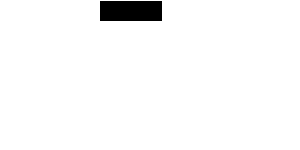
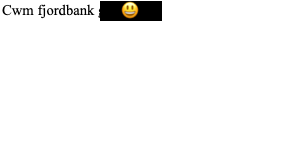
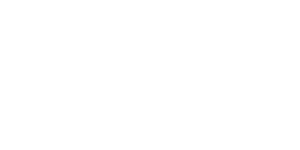
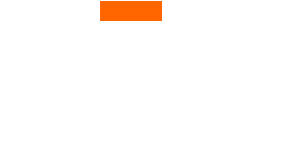
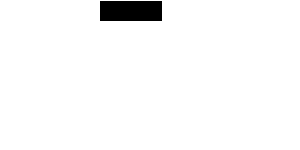
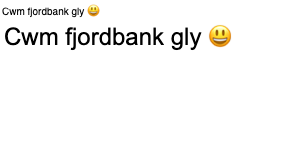
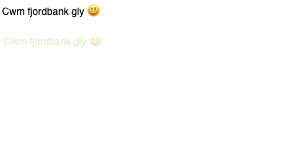
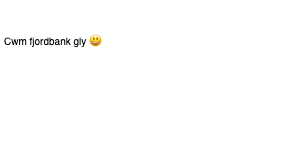
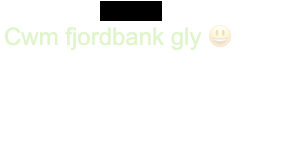
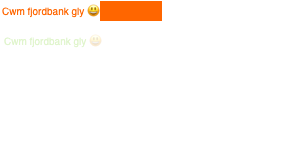
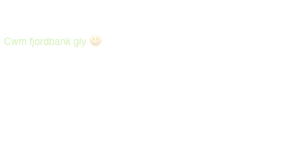
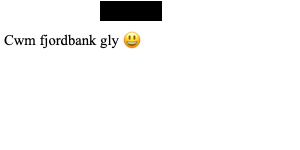
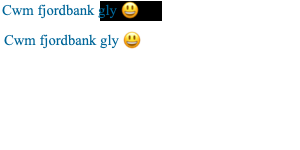
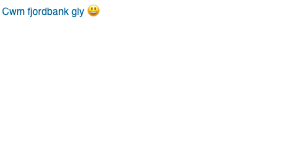
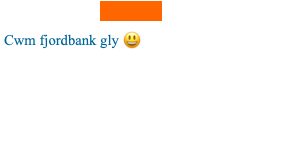
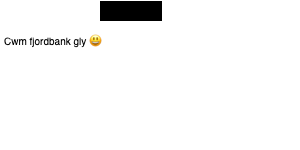
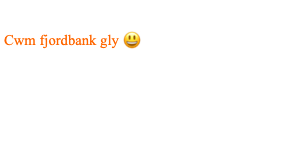
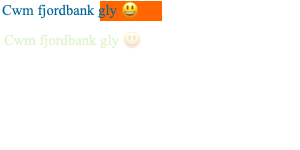
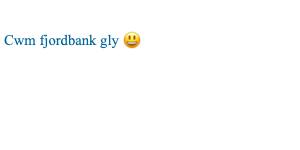
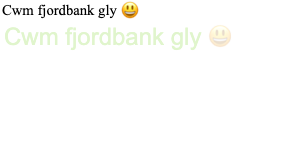
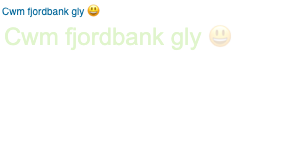
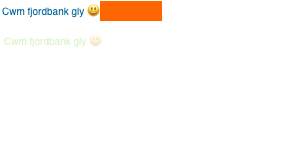
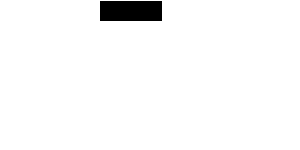
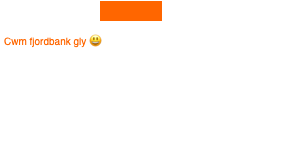
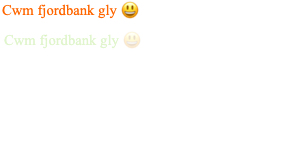
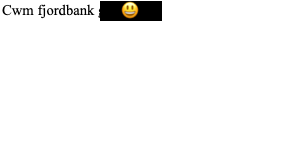
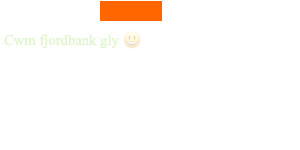
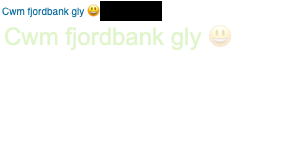
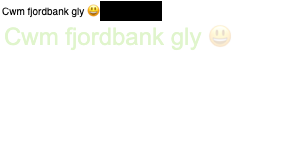
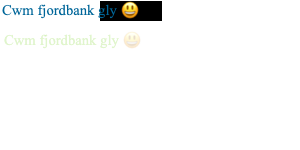
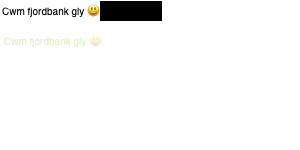
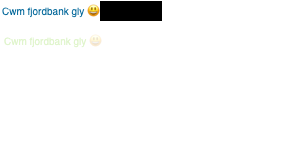
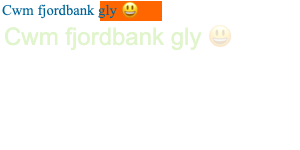
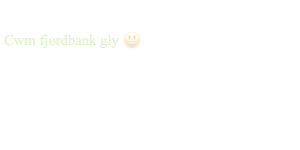
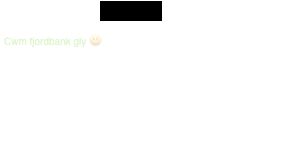
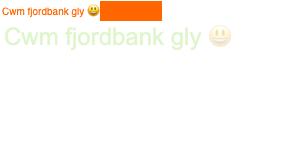
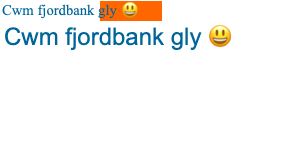
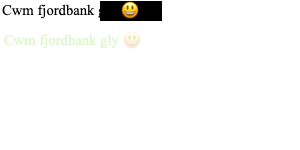
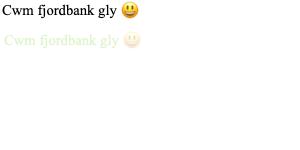
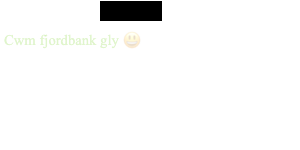
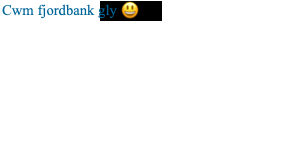
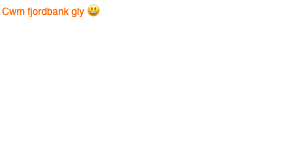
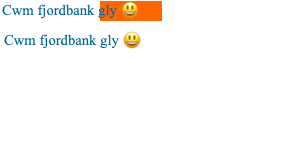
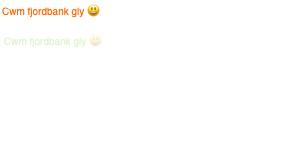
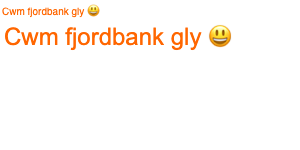
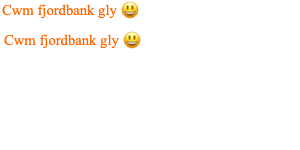
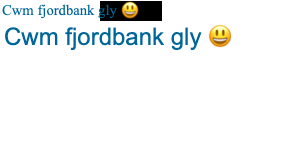
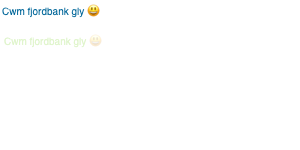
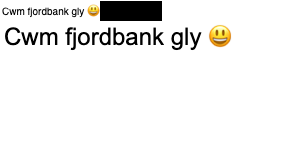
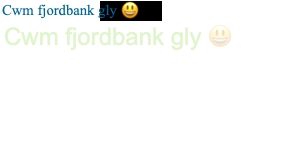
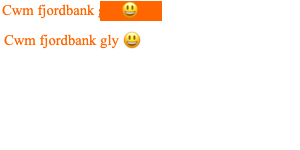
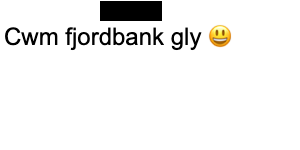
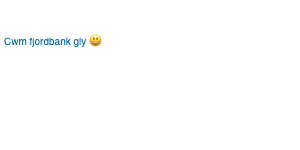
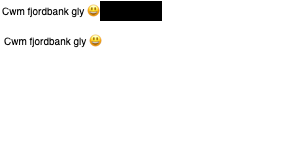
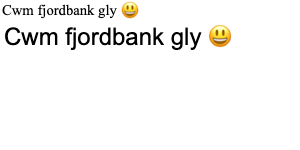
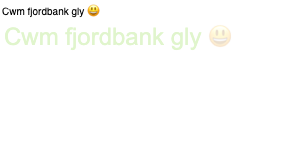
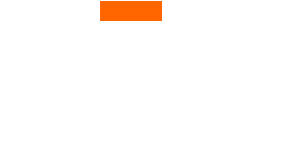
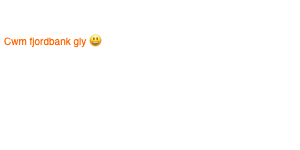
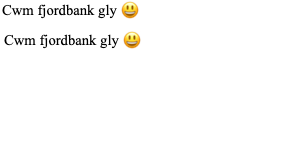
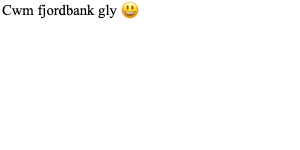
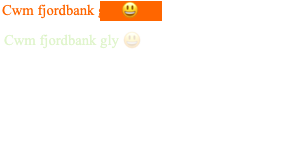
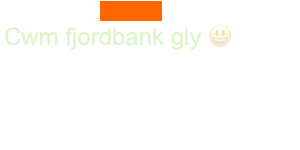
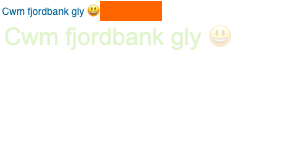
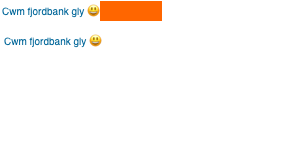
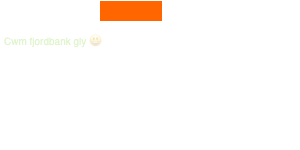
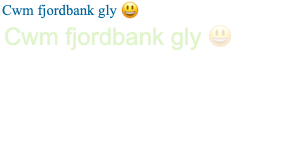
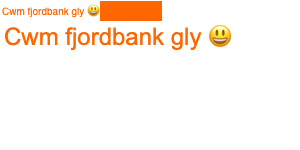
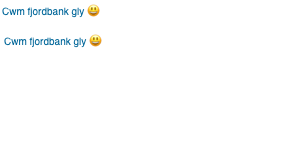
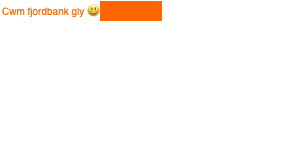
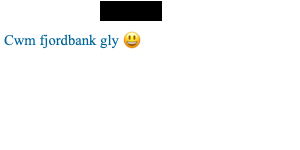
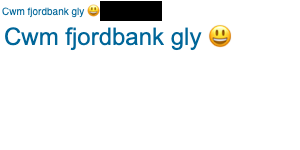
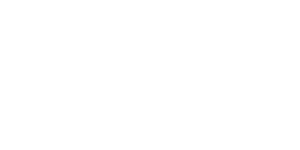
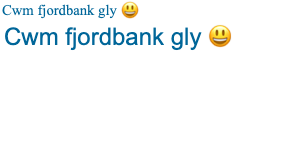
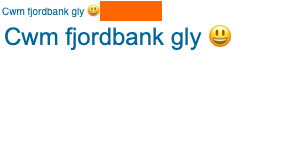
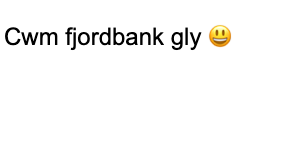
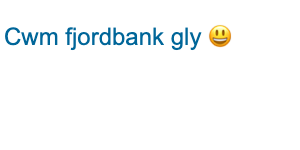
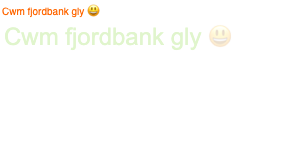
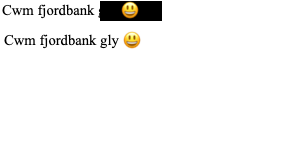
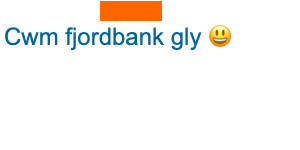
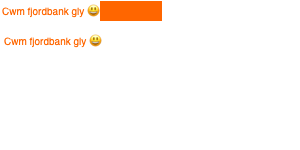
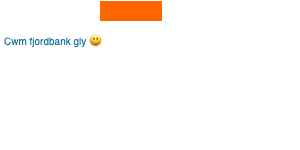
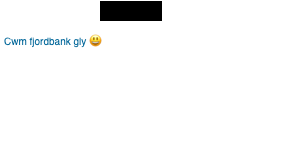
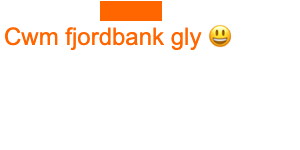
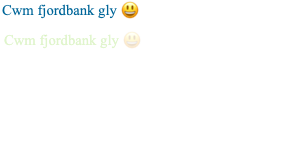
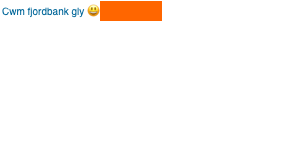
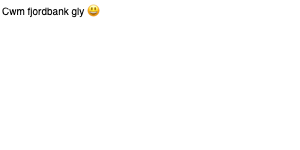
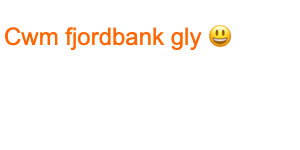
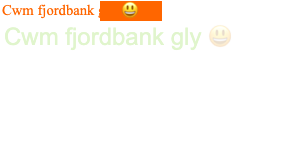
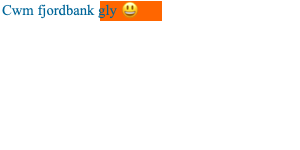
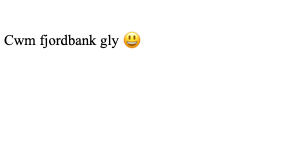
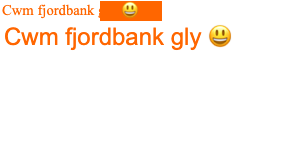
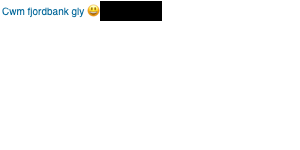
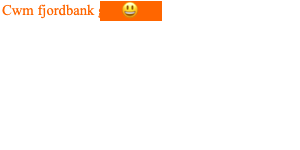
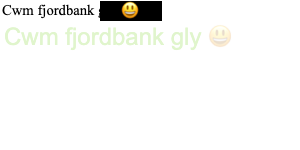
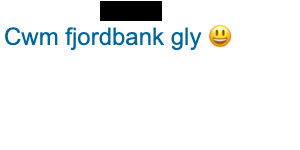
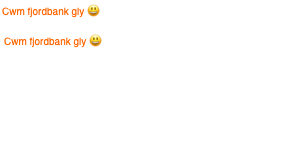
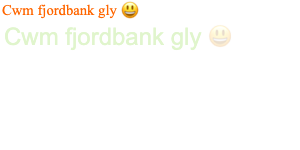
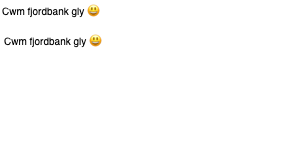
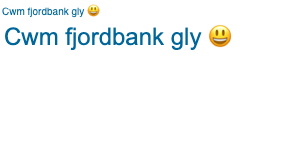
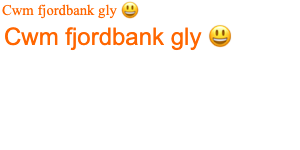
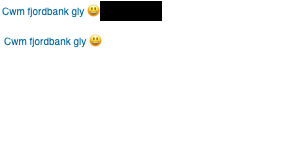
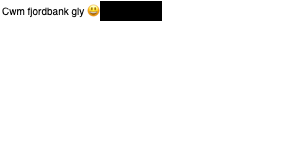
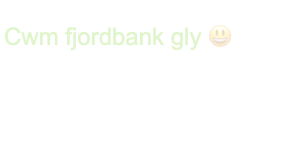
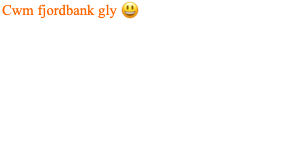
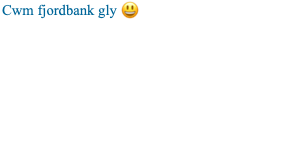
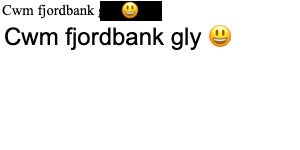
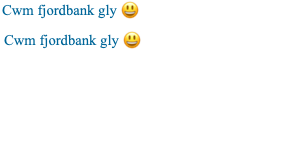
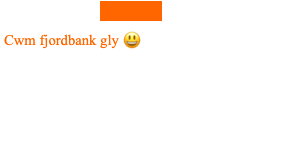
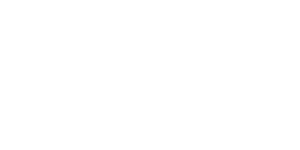
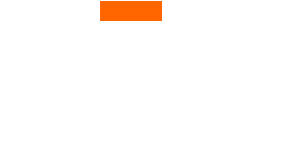
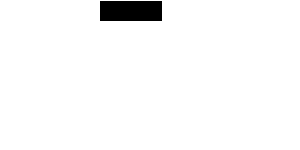
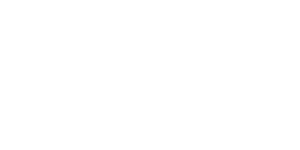
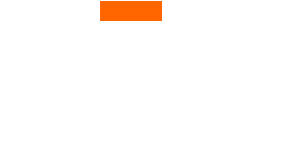
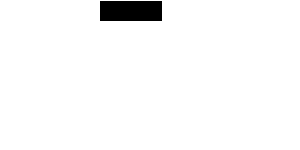
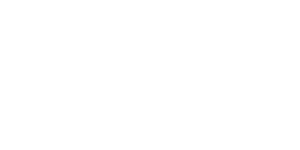
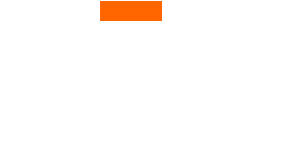
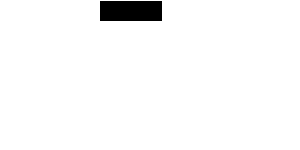
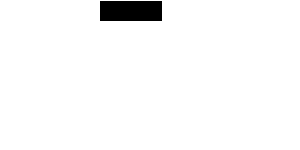
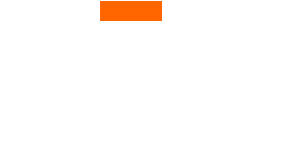
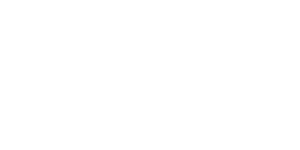
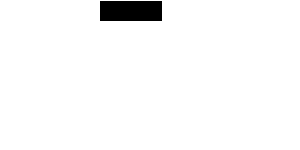
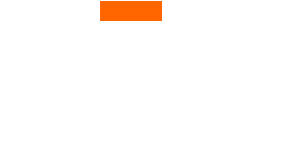
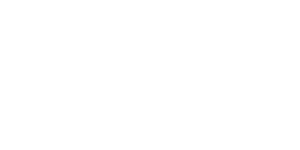

In [24]:
common_keys

['', '', '', '', '', '']

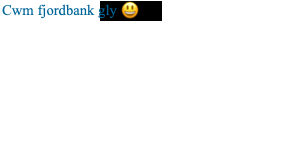
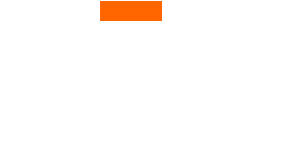
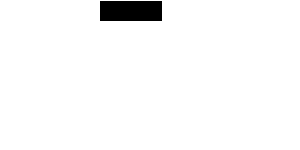
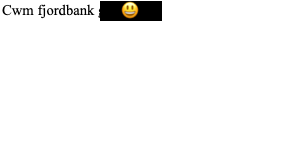
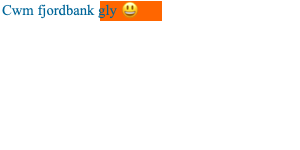
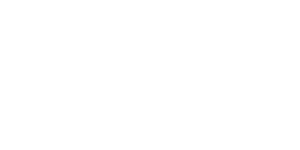

In [25]:
for key in common_keys:
    k1, k2, v = key
    if (k1, k2) == ('elisa-chrome', 'seoyoung_macos_edge'):
        print(v)

{'': [[0,
   1],
  [0, 1, 2],
  [0, 1, 3],
  [0, 1, 2, 3],
  [0, 1, 5],
  [0, 1, 2, 5],
  [0, 1, 3, 5],
  [0, 1, 2, 3, 5],
  [0, 1, 6],
  [0, 1, 2, 6],
  [0, 1, 3, 6],
  [0, 1, 2, 3, 6],
  [0, 1, 5, 6],
  [0, 1, 2, 5, 6],
  [0, 1, 3, 5, 6],
  [0, 1, 2, 3, 5, 6],
  [0, 1, 8],
  [0, 1, 2, 8],
  [0, 1, 3, 8],
  [0, 1, 2, 3, 8],
  [0, 1, 5, 8],
  [0, 1, 2, 5, 8],
  [0, 1, 3, 5, 8],
  [0, 1, 2, 3, 5, 8],
  [0, 1, 6, 8],
  [0, 1, 2, 6, 8],
  [0, 1, 3, 6, 8],
  [0, 1, 2, 3, 6, 8],
  [0, 1, 5, 6, 8],
  [0, 1, 2, 5, 6, 8],
  [0, 1, 3, 5, 6, 8],
  [0, 1, 2, 3, 5, 6, 8],
  [0, 1, 9],
  [0, 1, 2, 9],
  [0, 1, 3, 9],
  [0, 1, 2, 3, 9],
  [0, 1, 5, 9],
  [0, 1, 2, 5, 9],
  [0, 1, 3, 5, 9],
  [0, 1, 2, 3, 5, 9],
  [0, 1, 6, 9],
  [0, 1, 2, 6, 9],
  [0, 1, 3, 6, 9],
  [0, 1, 2, 3, 6, 9],
  [0, 1, 5, 6, 9],
  [0, 1, 2, 5, 6, 9],
  [0, 1, 3, 5, 6, 9],
  [0, 1, 2, 3, 5, 6, 9],
  [0, 1, 8, 9],
  [0, 1, 2, 8, 9],
  [0, 1, 3, 8, 9],
  [0, 1, 2, 3, 8, 9],
  [0, 1, 5, 8, 9],
  [0, 1, 2, 5, 8, 9],
  [0, 1, 3, 
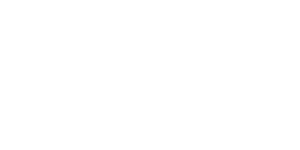
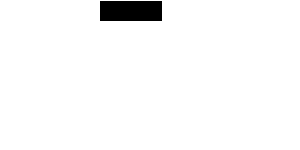
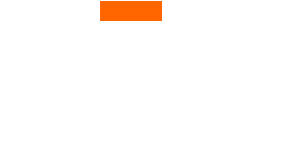
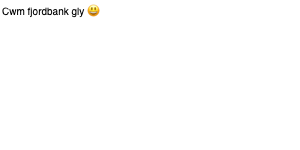
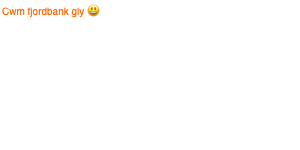
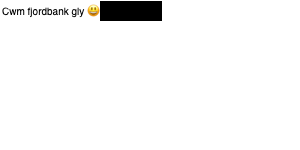
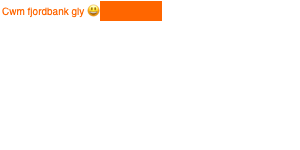
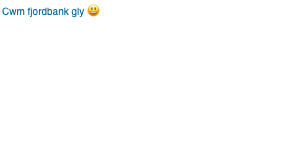
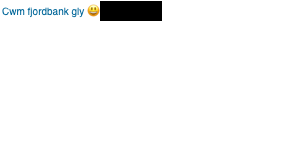
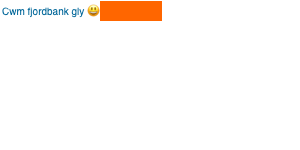
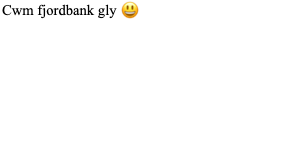
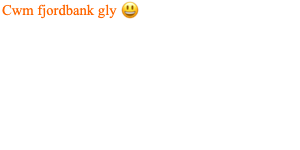
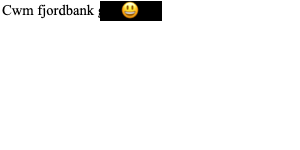
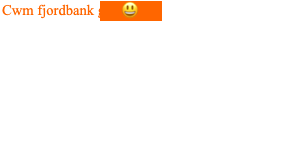
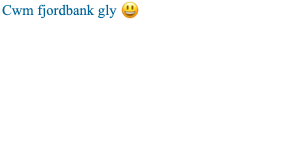
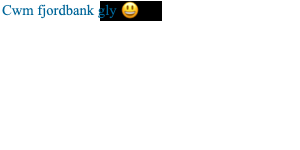
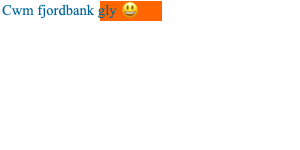
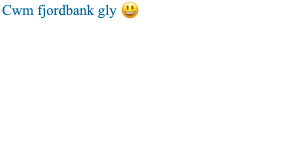
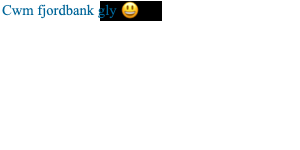
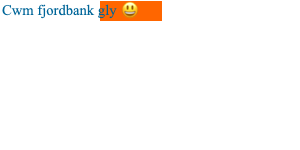
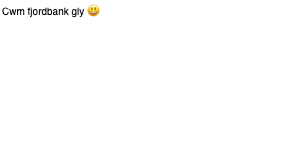
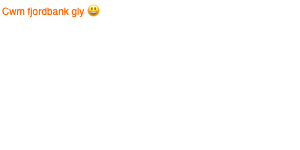
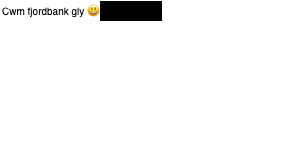
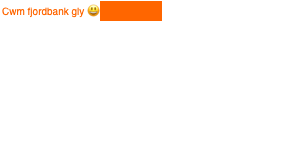
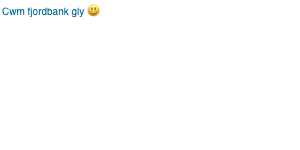
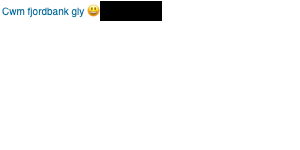
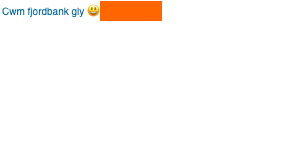
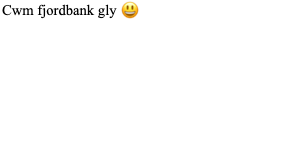
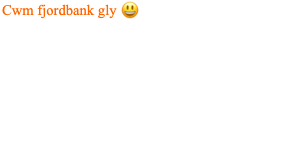
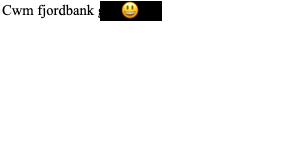
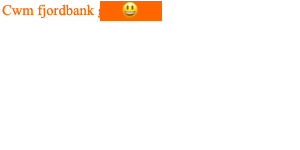
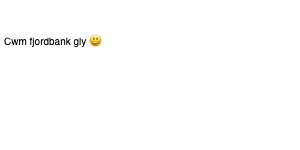
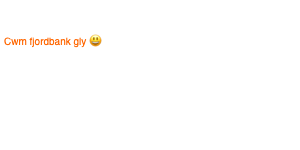
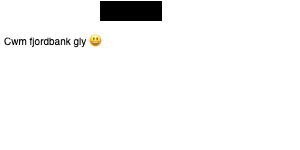
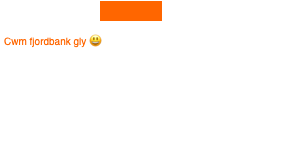
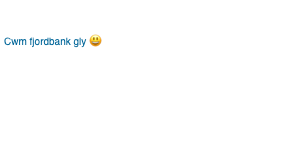
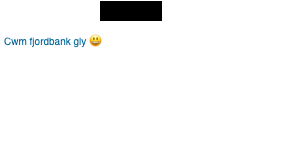
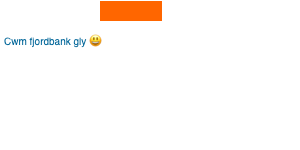
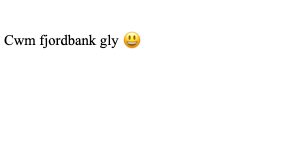
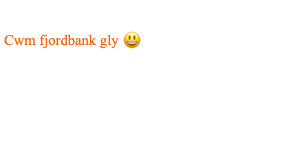
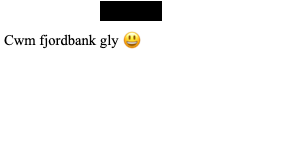
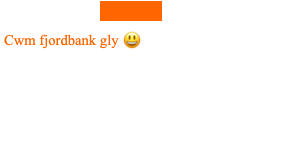
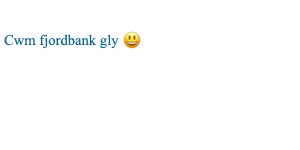
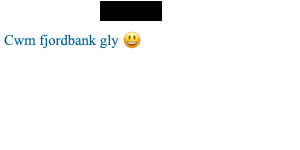
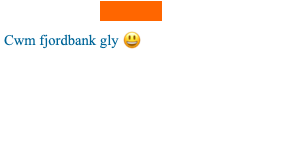
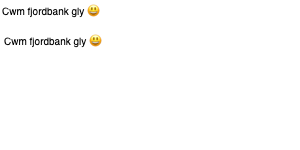
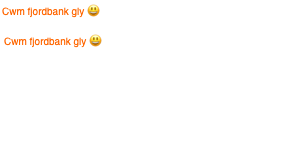
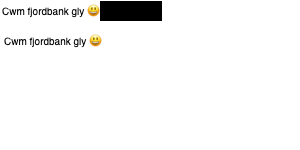
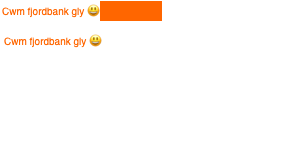
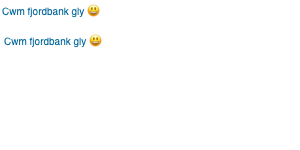
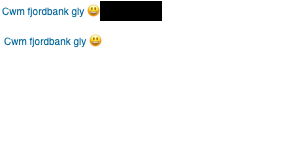
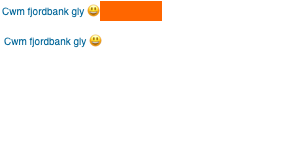
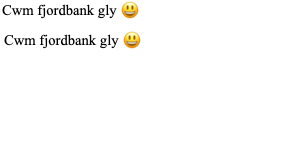
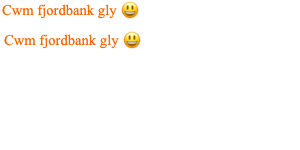
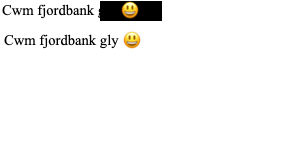
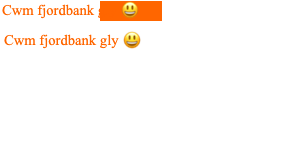
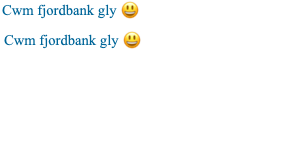
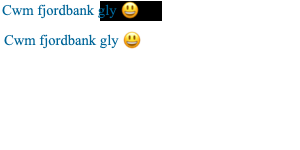
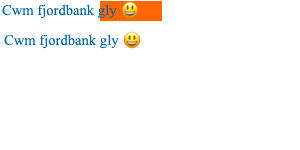
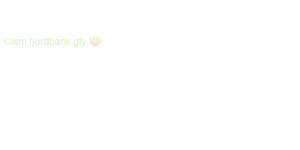
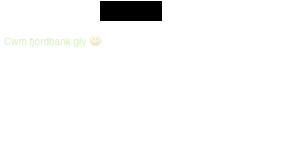
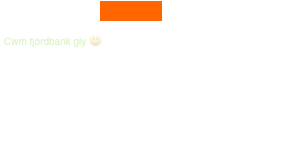
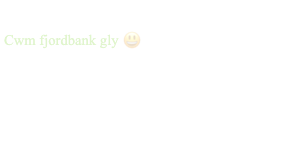
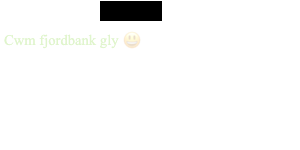
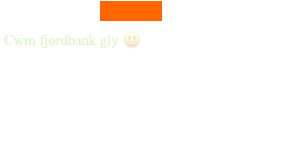
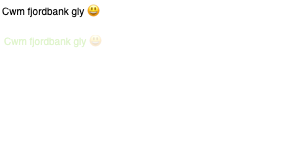
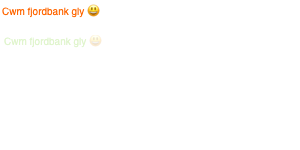
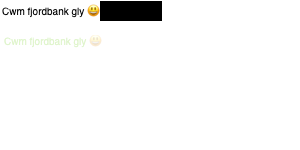
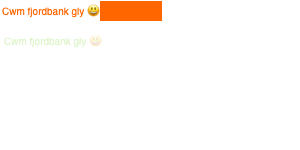
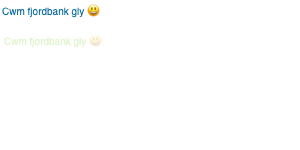
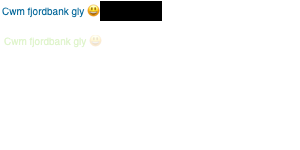
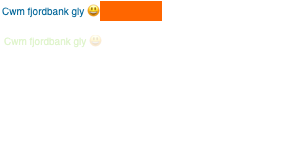
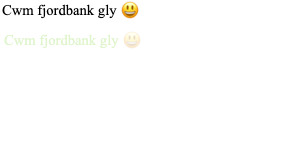
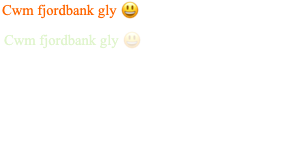
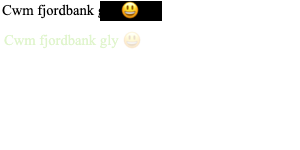
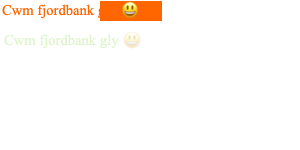
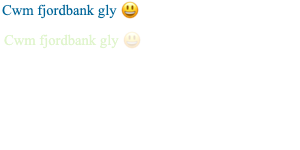
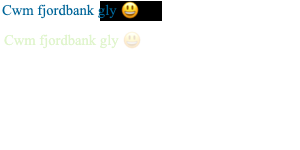
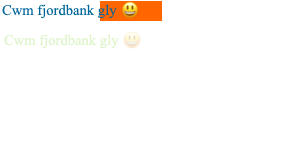
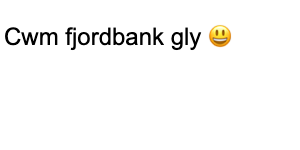
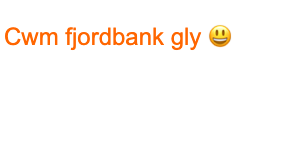
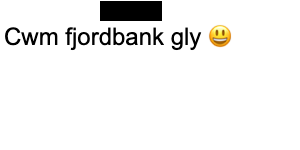
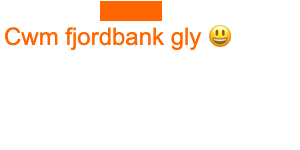
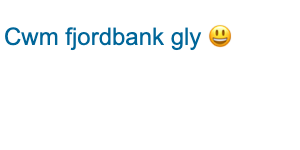
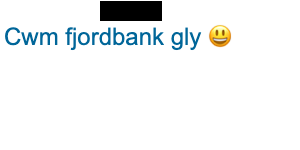
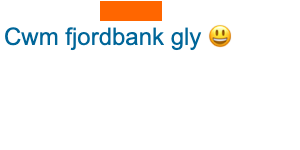
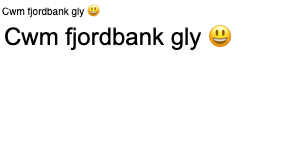
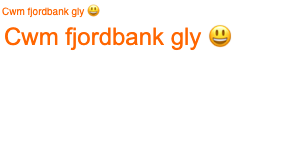
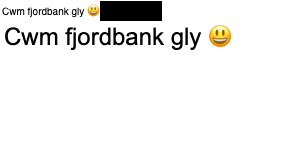
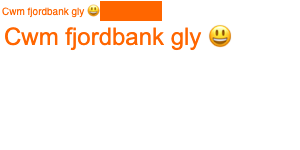
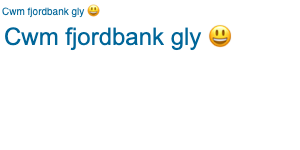
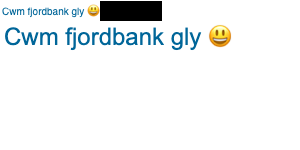
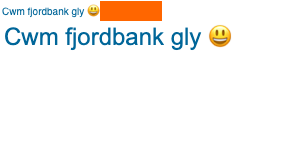
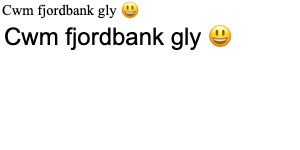
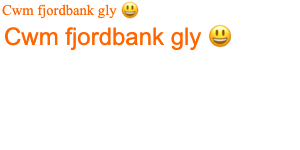
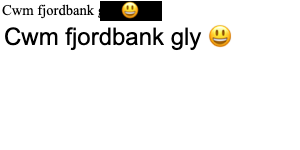
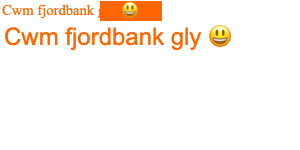
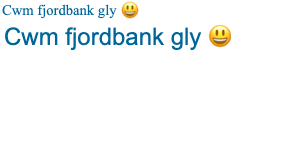
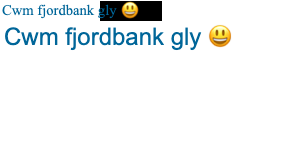
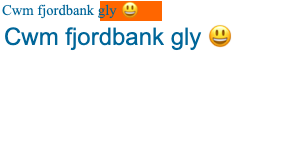
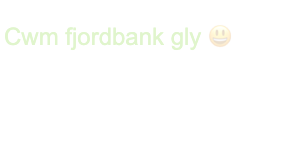
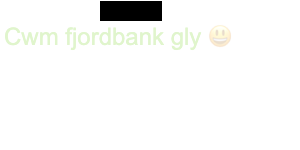
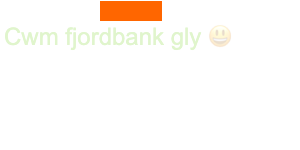
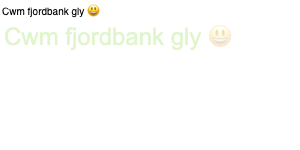
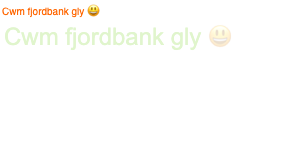
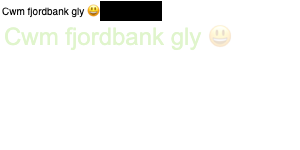
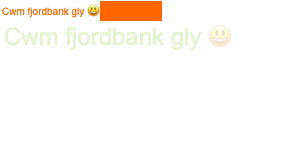
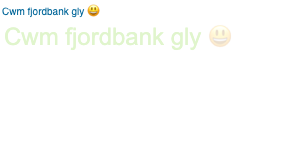
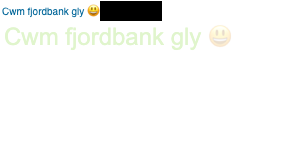
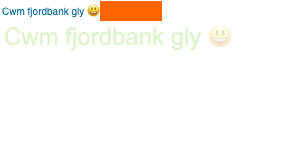
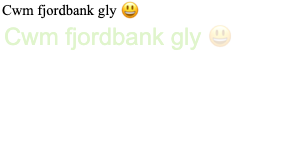
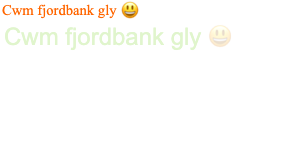
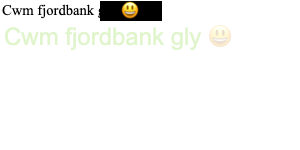
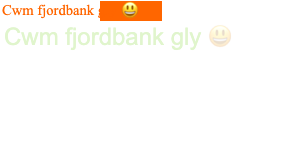
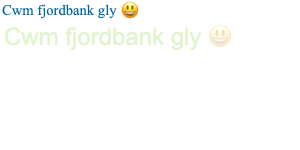
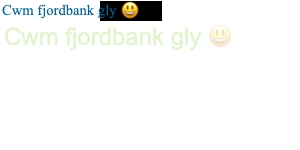
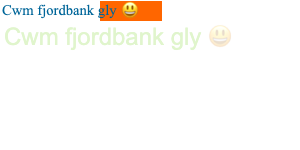

In [10]:
combined_grouped_data['seoyoung_macos_firefox']